In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv("Data_customer_olist.csv", sep='\t', index_col=0)

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nb_total_commandes             93358 non-null  int64  
 1   nb_total_produit               93358 non-null  int64  
 2   date_commande_plus_recente     93358 non-null  object 
 3   nb_moyen_photo_par_commande    93358 non-null  float64
 4   valeur totale                  93358 non-null  float64
 5   taille_commande_moyenne        93358 non-null  float64
 6   max_type_payement              93358 non-null  int64  
 7   max_tranches_payement          93358 non-null  int64  
 8   nb_moyen_jours_livraison       93358 non-null  float64
 9   notation_moyenne               93358 non-null  float64
 10  nb_produits_premium            93358 non-null  int64  
 11  moyenne_frais/valeur_commande  93358 non-null  float6

In [4]:
data_df.head()

nb_total_commandes  nb_total_produit  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                   1                 1   
0000b849f77a49e4a4ce2b2a4ca5be3f                   1                 1   
0000f46a3911fa3c0805444483337064                   1                 1   
0000f6ccb0745a6a4b88665a16c9f078                   1                 1   
0004aac84e0df4da2b147fca70cf8255                   1                 1   

                                 date_commande_plus_recente  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2        2018-05-10 10:56:27   
0000b849f77a49e4a4ce2b2a4ca5be3f        2018-05-07 11:11:27   
0000f46a3911fa3c0805444483337064        2017-03-10 21:05:03   
0000f6ccb0745a6a4b88665a16c9f078        2017-10-12 20:29:41   
0004aac84e0df4da2b147fca70cf8255        2017-11-14 19:45:42   

                                  nb_moyen_photo_par_commande  valeur totale  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                          1.0         129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f                          1.0          18.90   
0000f46a3911fa3c0805444483337064                          3.0          69.00   
0000f6ccb0745a6a4b88665a16c9f078                          5.0          25.99   
0004aac84e0df4da2b147fca70cf8255                          3.0         180.00   

                                  taille_commande_moyenne  max_type_payement  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                   141.90                  0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    27.19                  0   
0000f46a3911fa3c0805444483337064                    86.22                  0   
0000f6ccb0745a6a4b88665a16c9f078                    43.62                  0   
0004aac84e0df4da2b147fca70cf8255                   196.89                  0   

                                  max_tranches_payement  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                      1   
0000b849f77a49e4a4ce2b2a4ca5be3f                      0   
0000f46a3911fa3c0805444483337064                      1   
0000f6ccb0745a6a4b88665a16c9f078                      1   
0004aac84e0df4da2b147fca70cf8255                      1   

                                  nb_moyen_jours_livraison  notation_moyenne  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                       6.0               5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                       3.0               4.0   
0000f46a3911fa3c0805444483337064                      25.0               3.0   
0000f6ccb0745a6a4b88665a16c9f078                      20.0               4.0   
0004aac84e0df4da2b147fca70cf8255                      13.0               5.0   

                                  nb_produits_premium  \
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2                    0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0   
0000f46a3911fa3c0805444483337064                    0   
0000f6ccb0745a6a4b88665a16c9f078                    0   
0004aac84e0df4da2b147fca70cf8255                    1   

                                  moyenne_frais/valeur_commande  récence  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2                       0.084567      111   
0000b849f77a49e4a4ce2b2a4ca5be3f                       0.304892      114   
0000f46a3911fa3c0805444483337064                       0.199722      536   
0000f6ccb0745a6a4b88665a16c9f078                       0.404172      320   
0004aac84e0df4da2b147fca70cf8255                       0.085784      287   

                                           

In [5]:
subset = ['date_commande_plus_recente', 'max_type_payement', 'max_tranches_payement',
          'customer_state', 'product_category']
data = data_df.drop(subset, axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nb_total_commandes             93358 non-null  int64  
 1   nb_total_produit               93358 non-null  int64  
 2   nb_moyen_photo_par_commande    93358 non-null  float64
 3   valeur totale                  93358 non-null  float64
 4   taille_commande_moyenne        93358 non-null  float64
 5   nb_moyen_jours_livraison       93358 non-null  float64
 6   notation_moyenne               93358 non-null  float64
 7   nb_produits_premium            93358 non-null  int64  
 8   moyenne_frais/valeur_commande  93358 non-null  float64
 9   récence                        93358 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 7.8+ MB


In [7]:
data.head()

nb_total_commandes  nb_total_produit  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                   1                 1   
0000b849f77a49e4a4ce2b2a4ca5be3f                   1                 1   
0000f46a3911fa3c0805444483337064                   1                 1   
0000f6ccb0745a6a4b88665a16c9f078                   1                 1   
0004aac84e0df4da2b147fca70cf8255                   1                 1   

                                  nb_moyen_photo_par_commande  valeur totale  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                          1.0         129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f                          1.0          18.90   
0000f46a3911fa3c0805444483337064                          3.0          69.00   
0000f6ccb0745a6a4b88665a16c9f078                          5.0          25.99   
0004aac84e0df4da2b147fca70cf8255                          3.0         180.00   

                                  taille_commande_moyenne  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                   141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f                    27.19   
0000f46a3911fa3c0805444483337064                    86.22   
0000f6ccb0745a6a4b88665a16c9f078                    43.62   
0004aac84e0df4da2b147fca70cf8255                   196.89   

                                  nb_moyen_jours_livraison  notation_moyenne  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                       6.0               5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                       3.0               4.0   
0000f46a3911fa3c0805444483337064                      25.0               3.0   
0000f6ccb0745a6a4b88665a16c9f078                      20.0               4.0   
0004aac84e0df4da2b147fca70cf8255                      13.0               5.0   

                                  nb_produits_premium  \
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2                    0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0   
0000f46a3911fa3c0805444483337064                    0   
0000f6ccb0745a6a4b88665a16c9f078                    0   
0004aac84e0df4da2b147fca70cf8255                    1   

                                  moyenne_frais/valeur_commande  récence  
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                       0.084567      111  
0000b849f77a49e4a4ce2b2a4ca5be3f                       0.304892      114  
0000f46a3911fa3c0805444483337064                       0.199722      536  
0000f6ccb0745a6a4b88665a16c9f078                       0.404172      320  
0004aac84e0df4da2b147fca70cf8255                       0.085784      287

(0.0, 2000.0)

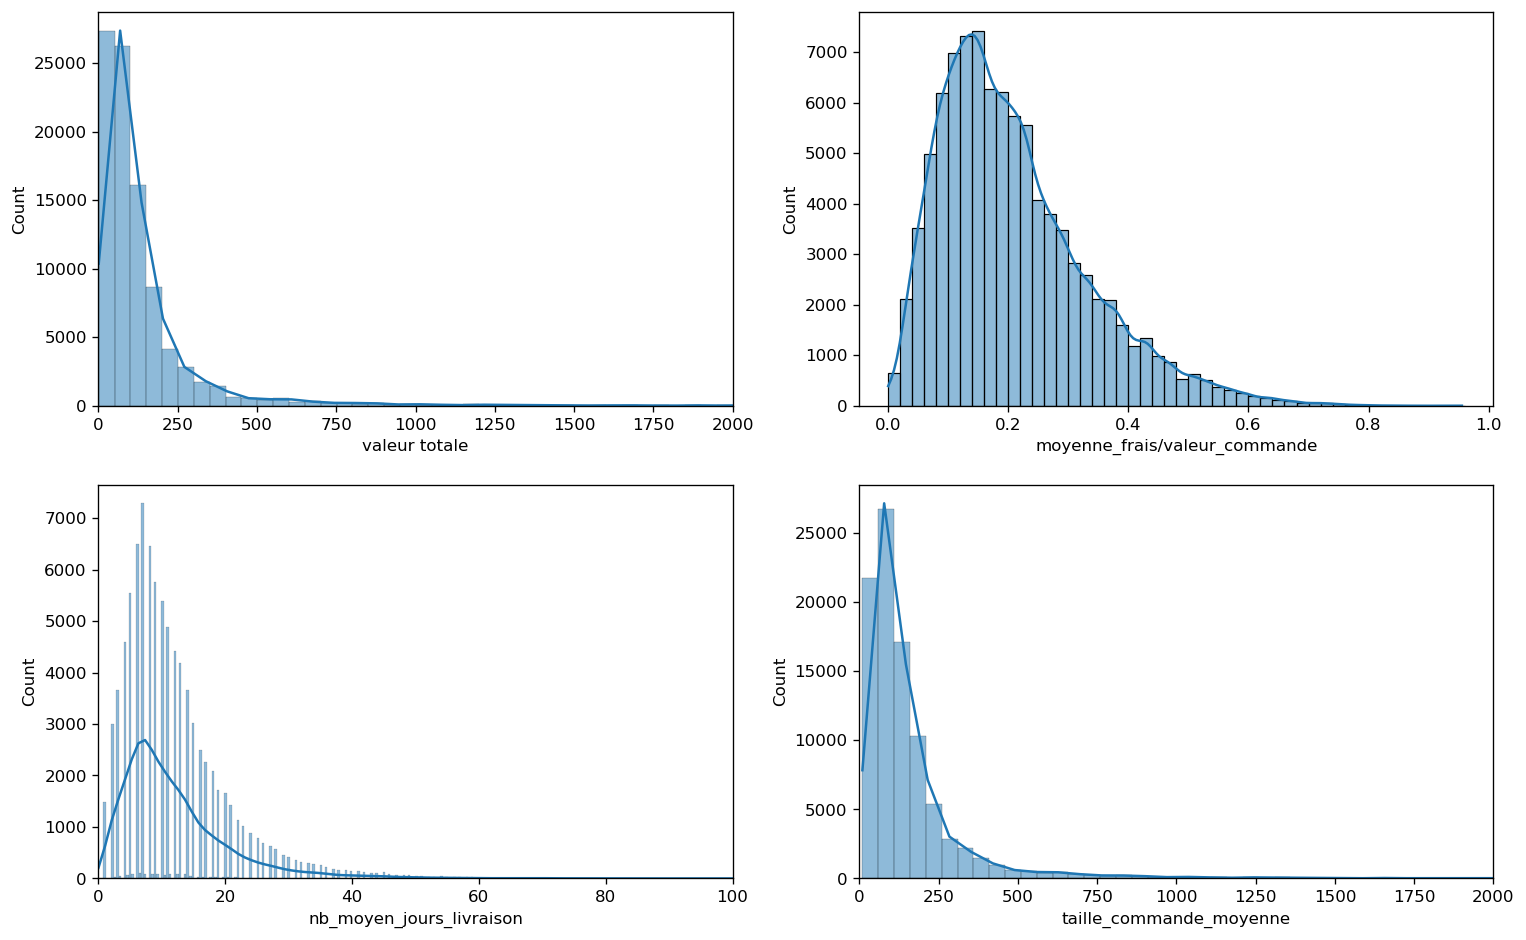

In [8]:
fig = plt.figure(figsize=[15, 20], dpi=120)
fig.add_subplot(4, 2, 1)
ax = sns.histplot(data, x='valeur totale', kde=True, binwidth=50)
ax.set_xlim(0, 2000)
fig.add_subplot(4, 2, 2)
ax = sns.histplot(data, x='moyenne_frais/valeur_commande',
                  kde=True, binwidth=0.02)
plt.xlim = (0, 1)
fig.add_subplot(4, 2, 3)
ax = sns.histplot(data, x='nb_moyen_jours_livraison', kde=True)
ax.set_xlim(0, 100)
fig.add_subplot(4, 2, 4)
ax = sns.histplot(data, x='taille_commande_moyenne', kde=True, binwidth=50)
ax.set_xlim(0, 2000)

In [9]:
data['valeur totale'] = np.log1p(data['valeur totale'])
data['moyenne_frais/valeur_commande'] = np.log1p(
    data['moyenne_frais/valeur_commande'])
data['nb_moyen_jours_livraison'] = np.log1p(data['nb_moyen_jours_livraison'])
data['taille_commande_moyenne'] = np.log1p(data['taille_commande_moyenne'])

In [10]:
data.head()

nb_total_commandes  nb_total_produit  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                   1                 1   
0000b849f77a49e4a4ce2b2a4ca5be3f                   1                 1   
0000f46a3911fa3c0805444483337064                   1                 1   
0000f6ccb0745a6a4b88665a16c9f078                   1                 1   
0004aac84e0df4da2b147fca70cf8255                   1                 1   

                                  nb_moyen_photo_par_commande  valeur totale  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                          1.0       4.874434   
0000b849f77a49e4a4ce2b2a4ca5be3f                          1.0       2.990720   
0000f46a3911fa3c0805444483337064                          3.0       4.248495   
0000f6ccb0745a6a4b88665a16c9f078                          5.0       3.295466   
0004aac84e0df4da2b147fca70cf8255                          3.0       5.198497   

                                  taille_commande_moyenne  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                 4.962145   
0000b849f77a49e4a4ce2b2a4ca5be3f                 3.338967   
0000f46a3911fa3c0805444483337064                 4.468434   
0000f6ccb0745a6a4b88665a16c9f078                 3.798182   
0004aac84e0df4da2b147fca70cf8255                 5.287711   

                                  nb_moyen_jours_livraison  notation_moyenne  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                  1.945910               5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                  1.386294               4.0   
0000f46a3911fa3c0805444483337064                  3.258097               3.0   
0000f6ccb0745a6a4b88665a16c9f078                  3.044522               4.0   
0004aac84e0df4da2b147fca70cf8255                  2.639057               5.0   

                                  nb_produits_premium  \
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2                    0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0   
0000f46a3911fa3c0805444483337064                    0   
0000f6ccb0745a6a4b88665a16c9f078                    0   
0004aac84e0df4da2b147fca70cf8255                    1   

                                  moyenne_frais/valeur_commande  récence  
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                       0.081180      111  
0000b849f77a49e4a4ce2b2a4ca5be3f                       0.266120      114  
0000f46a3911fa3c0805444483337064                       0.182090      536  
0000f6ccb0745a6a4b88665a16c9f078                       0.339448      320  
0004aac84e0df4da2b147fca70cf8255                       0.082302      287

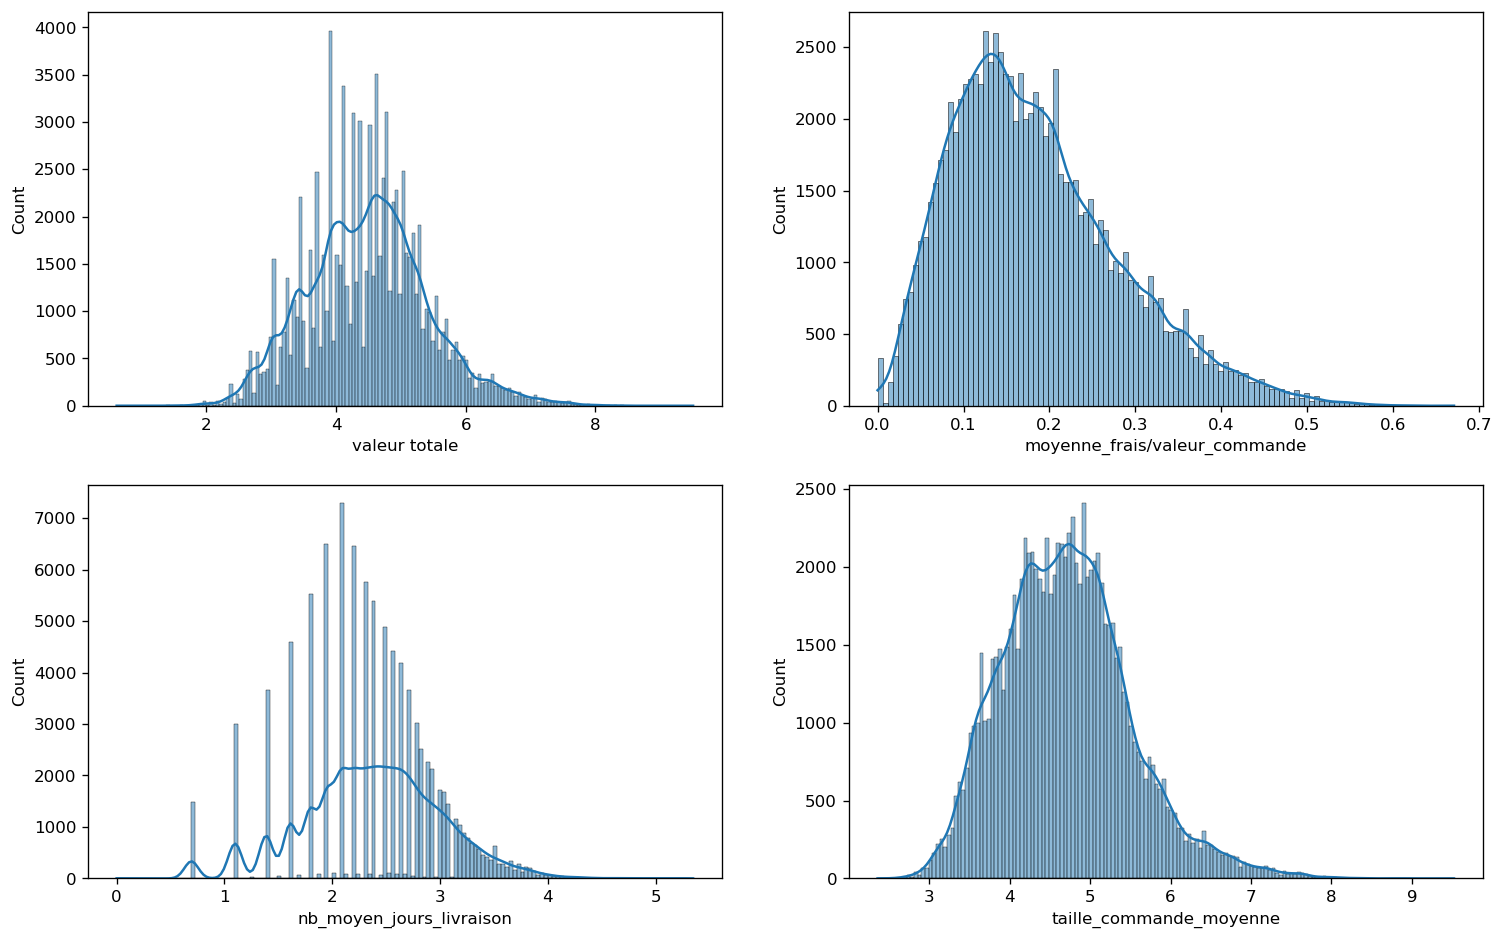

In [11]:
fig = plt.figure(figsize=[15, 20], dpi=120)
fig.add_subplot(4, 2, 1)
ax = sns.histplot(data, x='valeur totale', kde=True)
plt.xlim = (0, 1)
plt.ylim = (0, 5000)
fig.add_subplot(4, 2, 2)
ax = sns.histplot(data, x='moyenne_frais/valeur_commande', kde=True)
plt.xlim = (0, 1)
plt.ylim = (0, 5000)
fig.add_subplot(4, 2, 3)
ax = sns.histplot(data, x='nb_moyen_jours_livraison', kde=True)
plt.xlim = (0, 1)
plt.ylim = (0, 5000)
fig.add_subplot(4, 2, 4)
ax = sns.histplot(data, x='taille_commande_moyenne', kde=True)
plt.xlim = (0, 2)

# Segmentation continue - clustering avec K-means

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from yellowbrick.cluster import SilhouetteVisualizer

In [13]:
# on definit MinMaxscaler
scaler = MinMaxScaler()
# on transforme les données
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)
data_scaled.head()

nb_total_commandes  nb_total_produit  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                 0.0               0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                 0.0               0.0   
0000f46a3911fa3c0805444483337064                 0.0               0.0   
0000f6ccb0745a6a4b88665a16c9f078                 0.0               0.0   
0004aac84e0df4da2b147fca70cf8255                 0.0               0.0   

                                  nb_moyen_photo_par_commande  valeur totale  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                         0.05       0.479058   
0000b849f77a49e4a4ce2b2a4ca5be3f                         0.05       0.267188   
0000f46a3911fa3c0805444483337064                         0.15       0.408656   
0000f6ccb0745a6a4b88665a16c9f078                         0.25       0.301464   
0004aac84e0df4da2b147fca70cf8255                         0.15       0.515507   

                                  taille_commande_moyenne  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                 0.363304   
0000b849f77a49e4a4ce2b2a4ca5be3f                 0.136688   
0000f46a3911fa3c0805444483337064                 0.294376   
0000f6ccb0745a6a4b88665a16c9f078                 0.200801   
0004aac84e0df4da2b147fca70cf8255                 0.408757   

                                  nb_moyen_jours_livraison  notation_moyenne  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                  0.363918              1.00   
0000b849f77a49e4a4ce2b2a4ca5be3f                  0.259261              0.75   
0000f46a3911fa3c0805444483337064                  0.609319              0.50   
0000f6ccb0745a6a4b88665a16c9f078                  0.569377              0.75   
0004aac84e0df4da2b147fca70cf8255                  0.493549              1.00   

                                  nb_produits_premium  \
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2             0.000000   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.000000   
0000f46a3911fa3c0805444483337064             0.000000   
0000f6ccb0745a6a4b88665a16c9f078             0.000000   
0004aac84e0df4da2b147fca70cf8255             0.166667   

                                  moyenne_frais/valeur_commande   récence  
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2                       0.121053  0.155680  
0000b849f77a49e4a4ce2b2a4ca5be3f                       0.396826  0.159888  
0000f46a3911fa3c0805444483337064                       0.271524  0.751753  
0000f6ccb0745a6a4b88665a16c9f078                       0.506170  0.448808  
0004aac84e0df4da2b147fca70cf8255                       0.122725  0.402525

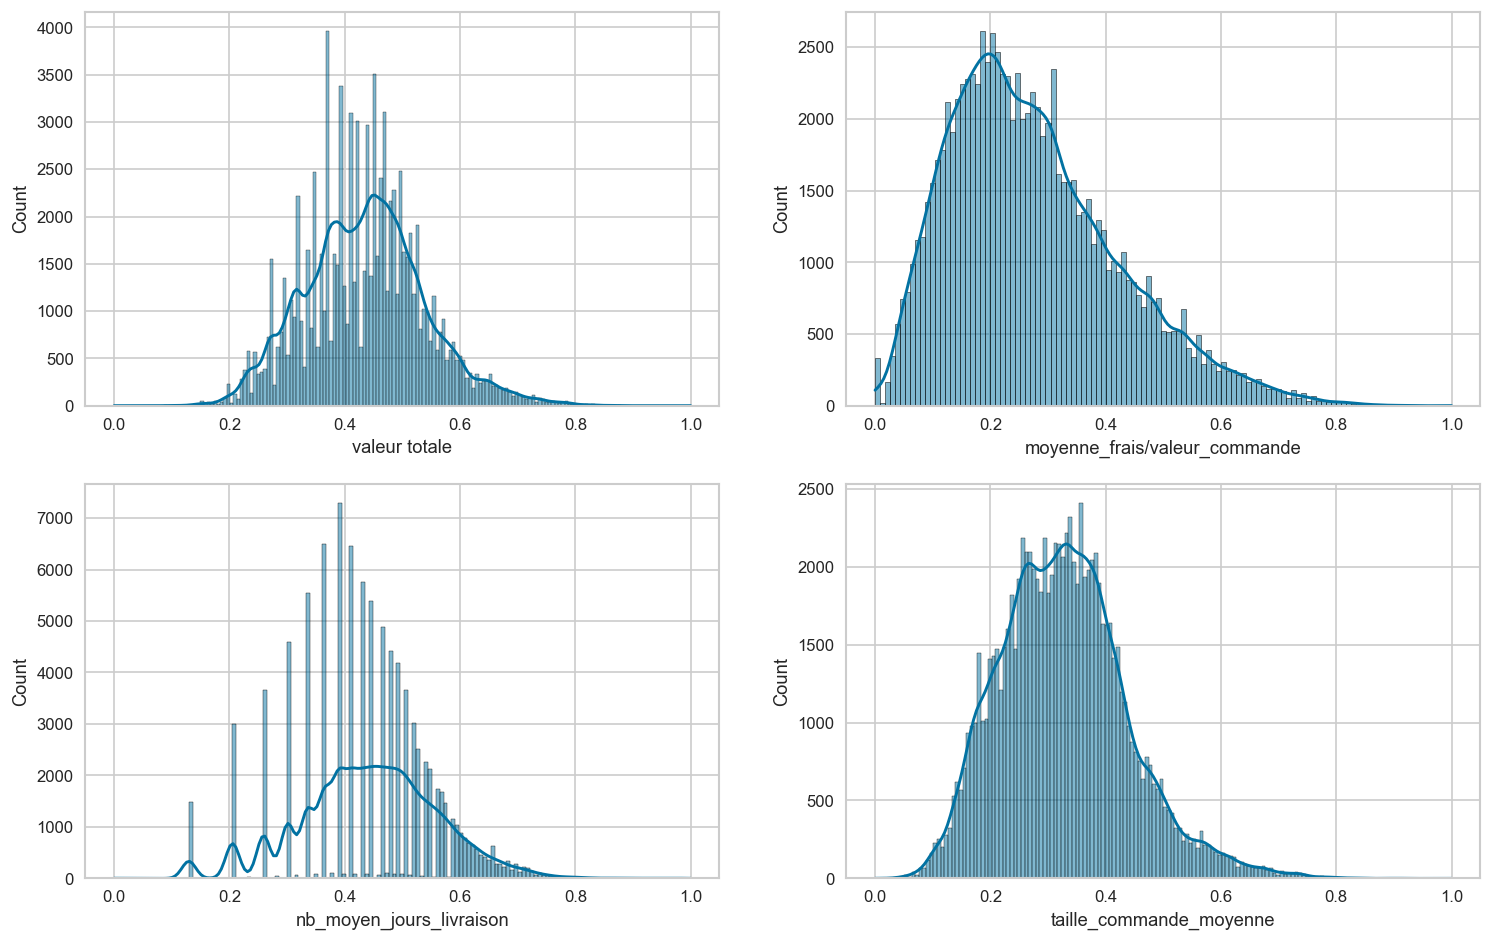

In [14]:
fig = plt.figure(figsize=[15, 20], dpi=120)
fig.add_subplot(4, 2, 1)
ax = sns.histplot(data_scaled, x='valeur totale', kde=True)
plt.xlim = (0, 1)
plt.ylim = (0, 5000)
fig.add_subplot(4, 2, 2)
ax = sns.histplot(data_scaled, x='moyenne_frais/valeur_commande', kde=True)
plt.xlim = (0, 1)
plt.ylim = (0, 5000)
fig.add_subplot(4, 2, 3)
ax = sns.histplot(data_scaled, x='nb_moyen_jours_livraison', kde=True)
plt.xlim = (0, 1)
plt.ylim = (0, 5000)
fig.add_subplot(4, 2, 4)
ax = sns.histplot(data_scaled, x='taille_commande_moyenne', kde=True)
plt.xlim = (0, 1)

## Nombre optimale de clusters avec la méthode du coude (mèthode de Elbow) 

In [15]:
K = range(2, 11)
WCSS = []
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++",
                    max_iter=300, n_init=10, random_state=0)
    kmeans = kmeans.fit(data_scaled)
    t = kmeans.inertia_
    WCSS.append(t)

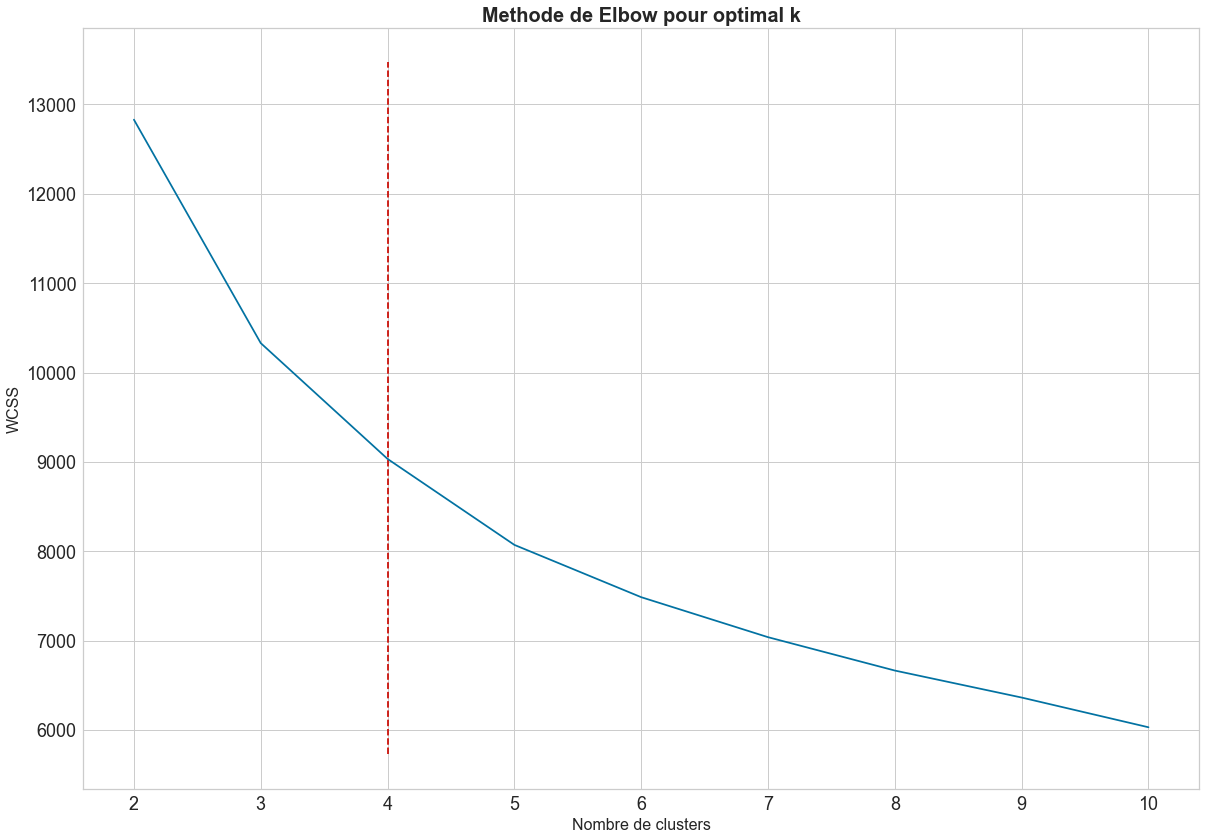

In [16]:
fig = plt.figure(figsize=[20, 14])
plt.plot(range(2, 11), WCSS)
plt.title('Methode de Elbow pour optimal k',
          fontsize=20, fontweight="bold")
plt.xlabel('Nombre de clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ymin = np.min(WCSS)*0.95
ymax = np.max(WCSS)*1.05
plt.ylim = (ymin, ymax)
plt.vlines(x=4, linestyles='--', color='r', ymin=ymin, ymax=ymax)
plt.show()

## Coefficient de silhouette 

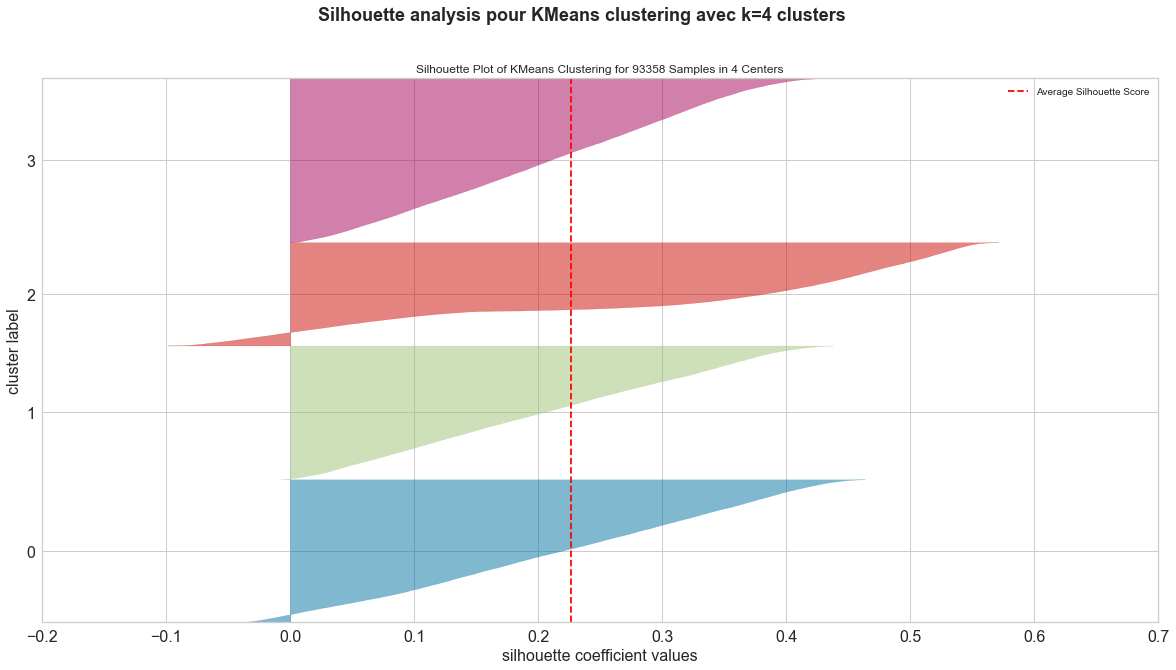

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93358 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
fig = plt.figure(figsize=[20, 10])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.suptitle('Silhouette analysis pour KMeans clustering avec k=4 clusters',
             fontsize=18, fontweight="bold")
plt.xlabel('Silhouette coefficient values', fontsize=16)
plt.ylabel('Cluster', fontsize=16)
kmeans = KMeans(n_clusters=4, init="k-means++",
                max_iter=300, n_init=10, random_state=0)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_scaled)        
visualizer.show()                  

## Analyse statistique des clusters 

In [18]:
kmeans = KMeans(n_clusters=4, init="k-means++",
                max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(data_scaled)
centroids = kmeans.cluster_centers_
data['cluster'] = kmeans.fit_predict(data_scaled)
data_scaled['cluster'] = kmeans.fit_predict(data_scaled)

In [19]:
print(data.columns)

Index(['nb_total_commandes', 'nb_total_produit', 'nb_moyen_photo_par_commande',
       'valeur totale', 'taille_commande_moyenne', 'nb_moyen_jours_livraison',
       'notation_moyenne', 'nb_produits_premium',
       'moyenne_frais/valeur_commande', 'récence', 'cluster'],
      dtype='object')


In [20]:
palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:gray']

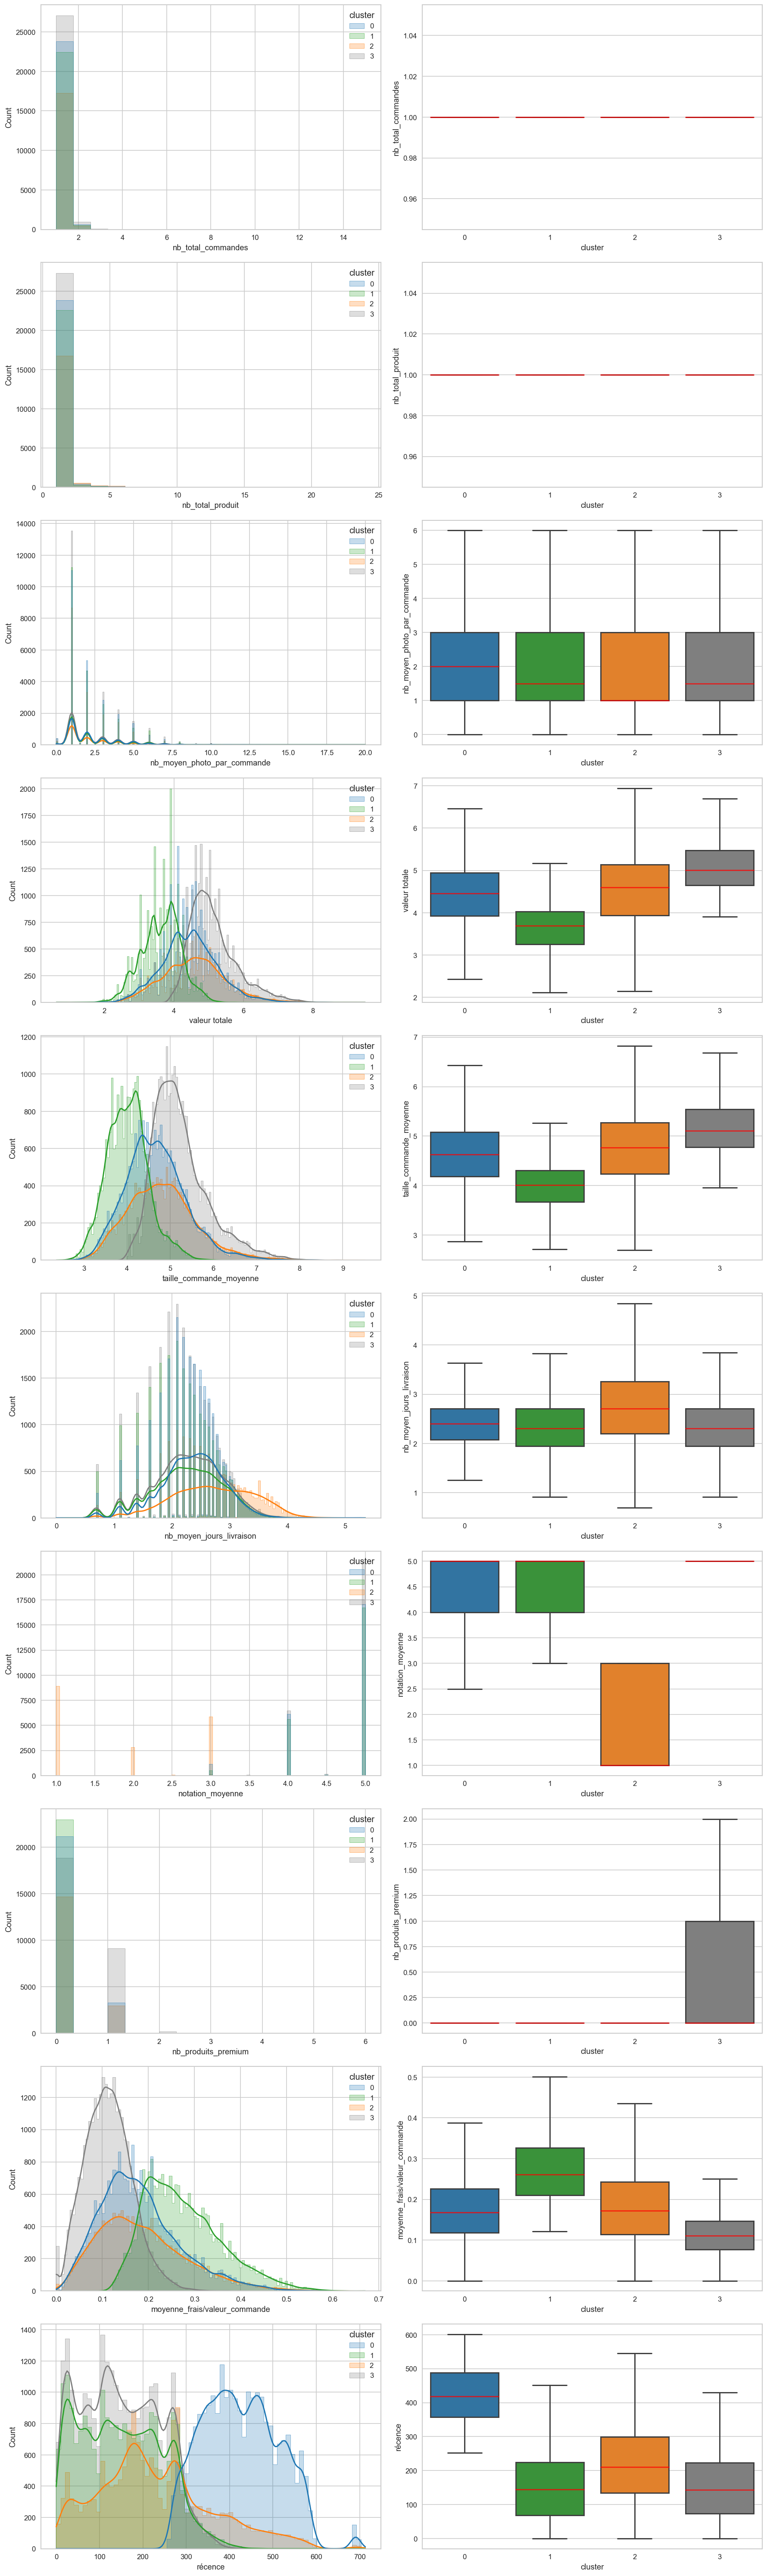

In [21]:
var = ['nb_total_commandes', 'nb_total_produit', 'nb_moyen_photo_par_commande', 'valeur totale', 'taille_commande_moyenne',
       'nb_moyen_jours_livraison', 'notation_moyenne', 'nb_produits_premium', 'moyenne_frais/valeur_commande', 'récence']
fig = plt.figure(figsize=[15, 50], dpi=120)
kde = [False, False, True, True, True, True, False, False, True, True]
for i in range(len(var)):
    fig.add_subplot(10, 2, 2*i+1)
    data_cluster = data[[var[i], 'cluster']]
    ax = sns.histplot(data_cluster, hue="cluster",
                      x=var[i], element="step", kde=kde[i], palette=palette)
    plt.setp(ax.get_legend().get_title(), fontsize='12')
    fig.add_subplot(10, 2, 2*i+2)
    ax1 = sns.boxplot(x='cluster', y=var[i], data=data_cluster,
                      palette=palette, medianprops=dict(color="red", alpha=0.7), showfliers=False)

plt.tight_layout()

In [22]:
data_grouped_cnt = data.groupby(
    ['cluster'])['nb_total_commandes'].count().reset_index()

data_grouped_cnt.drop(columns=['cluster'], inplace=True)
data_grouped_cnt.rename(columns={'nb_total_commandes': 'count'}, inplace=True)
data_grouped_cnt.head()

count
0  24466
1  22990
2  17728
3  28174

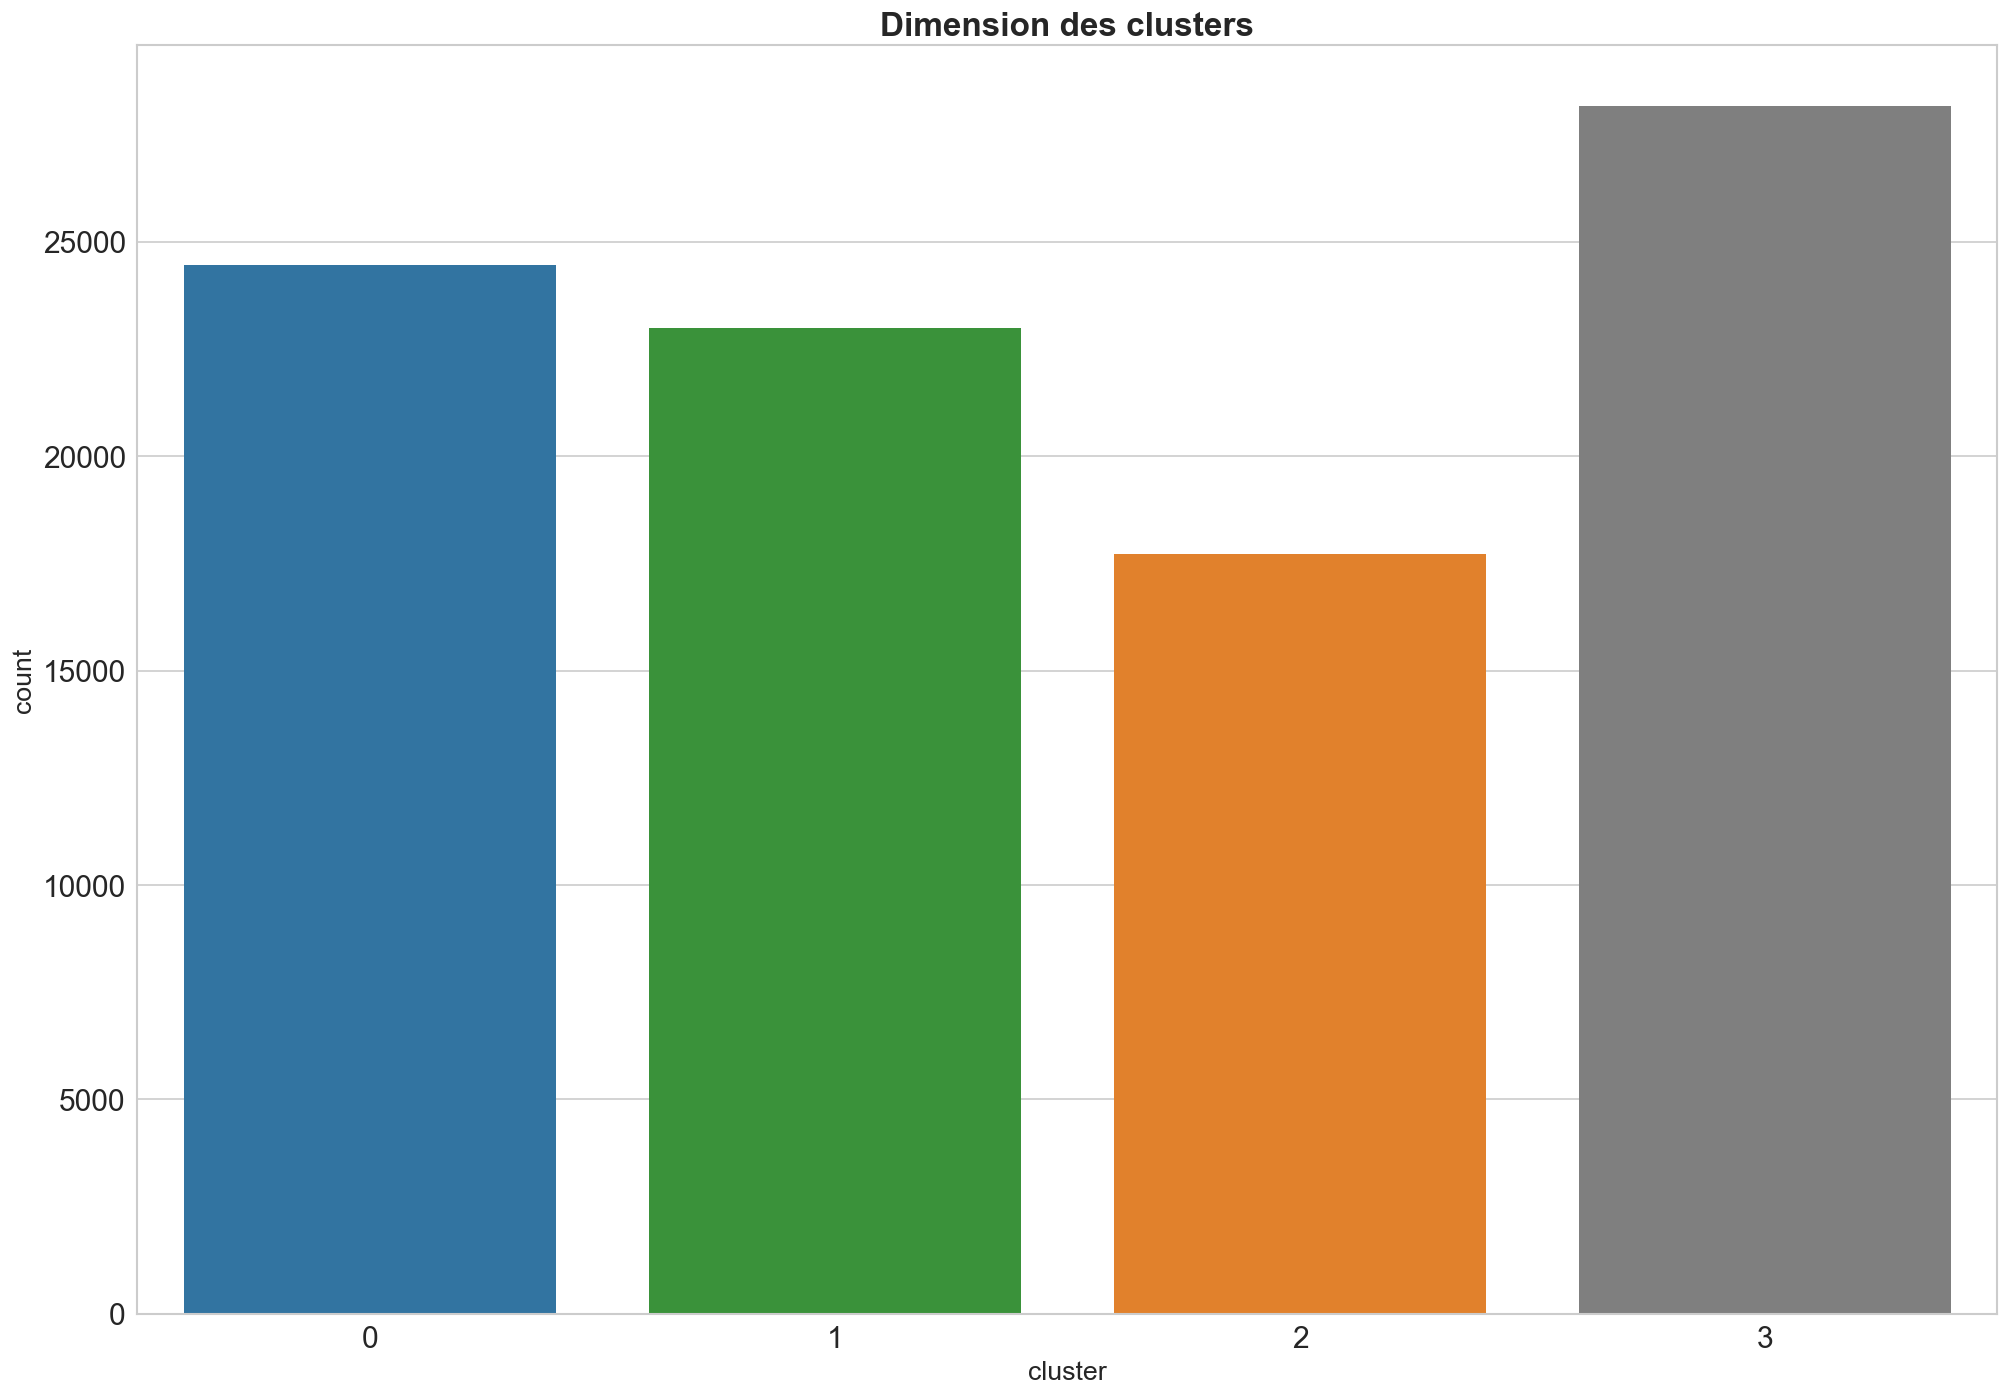

In [23]:
fig = plt.figure(figsize=[20, 14], dpi=120)
sns.barplot(x=data_grouped_cnt.index, y='count',
            data=data_grouped_cnt, palette=palette)
plt.title('Dimension des clusters', fontsize=20, fontweight="bold")
plt.xlabel('cluster', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [24]:
data_grouped = data.groupby(['cluster']).agg({
    'nb_total_commandes': ['mean', 'max', 'min'],
    'nb_total_produit': ['mean', 'max', 'min'],
    'nb_moyen_photo_par_commande': ['mean', 'max', 'min'],
    'valeur totale': ['mean', 'max', 'min'],
    'taille_commande_moyenne': ['mean', 'max', 'min'],
    'nb_moyen_jours_livraison': ['mean', 'max', 'min'],
    'notation_moyenne': ['mean', 'max', 'min'],
    'nb_produits_premium': ['mean', 'max', 'min'],
    'moyenne_frais/valeur_commande': ['mean', 'max', 'min'],
    'récence': ['mean', 'max', 'min']
}).round(1)

In [25]:
data_grouped

nb_total_commandes         nb_total_produit          \
                      mean max min             mean max min   
cluster                                                       
0                      1.0   6   1              1.2  15   1   
1                      1.0   5   1              1.1  11   1   
2                      1.0   9   1              1.3  21   1   
3                      1.0  15   1              1.2  24   1   

        nb_moyen_photo_par_commande            valeur totale            \
                               mean   max  min          mean  max  min   
cluster                                                                  
0                               2.2  18.0  0.0           4.5  8.9  1.9   
1                               2.2  15.0  0.0           3.6  6.0  0.6   
2                               2.2  19.0  0.0           4.6  9.5  1.5   
3                               2.3  20.0  0.0           5.1  8.8  3.9   

        taille_commande_moyenne           nb_moyen_jours_livraison            \
                           mean  max  min                     mean  max  min   
cluster                                                                        
0                           4.7  8.8  2.7                      2.3  5.3  0.0   
1                           4.0  6.4  2.4                      2.3  4.9  0.0   
2                           4.8  9.5  2.7                      2.7  5.3  0.0   
3                           5.2  8.8  4.0                      2.3  5.1  0.0   

        notation_moyenne           nb_produits_premium          \
                    mean  max  min                mean max min   
cluster                                                          
0                    4.7  5.0  2.5                 0.1   4   0   
1                    4.7  5.0  3.0                 0.0   1   0   
2                    1.8  3.0  1.0                 0.2   4   0   
3                    4.8  5.0  3.0                 0.3   6   0   

        moyenne_frais/valeur_commande           récence            
                                 mean  max  min    mean  max  min  
cluster                                                            
0                                 0.2  0.6  0.0   425.0  694  252  
1                                 0.3  0.7  0.1   150.6  477    0  
2                                 0.2  0.6  0.0   228.0  713    0  
3                                 0.1  0.5  0.0   149.7  461    0

## Radarplot et caracterisation des clusters

In [26]:
data_scaled_clusters = pd.DataFrame(centroids, columns=var)
data_scaled_clusters = scaler.fit_transform(data_scaled_clusters)
data_scaled_clusters = pd.DataFrame(data_scaled_clusters, columns=var)
data_scaled_clusters

nb_total_commandes  nb_total_produit  nb_moyen_photo_par_commande  \
0            0.219384          0.194427                     0.543109   
1            0.000000          0.000000                     0.000000   
2            0.188100          1.000000                     0.421112   
3            1.000000          0.360968                     1.000000   

   valeur totale  taille_commande_moyenne  nb_moyen_jours_livraison  \
0       0.545132                 0.533381                  0.205107   
1       0.000000                 0.000000                  0.000000   
2       0.628366                 0.646670                  1.000000   
3       1.000000                 1.000000                  0.036842   

   notation_moyenne  nb_produits_premium  moyenne_frais/valeur_commande  \
0          0.964862             0.404734                       0.411821   
1          0.984043             0.000000                       1.000000   
2          0.000000             0.521484                       0.449138   
3          1.000000             1.000000                       0.000000   

    récence  
0  1.000000  
1  0.002206  
2  0.284072  
3  0.000000

In [27]:
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()
fig = go.Figure(
    data=[
        go.Scatterpolar(r=data_scaled_clusters.loc[0], theta=var, name='Profil Client 1',
                        fill='toself', mode='lines', opacity=0.6, line_color='blue'),
        go.Scatterpolar(r=data_scaled_clusters.loc[1], theta=var, name='Profil Client 2',
                        fill='toself', mode='lines', opacity=0.6, line_color='green'),
        go.Scatterpolar(r=data_scaled_clusters.loc[2], theta=var, name='Profil Client 3',
                        fill='toself', mode='lines', opacity=0.6, line_color='orange'),
        go.Scatterpolar(r=data_scaled_clusters.loc[3], theta=var, name='Profil Client 4',
                        fill='toself', mode='lines', opacity=0.6, line_color='gray')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Comparaison profil clients'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.update_layout(
    margin=dict(l=200, r=200, t=100, b=20),
    autosize=False,
    width=1000,
    height=1000
)

fig.show()

# Visualisation des données - PCA

In [28]:
data.head()

nb_total_commandes  nb_total_produit  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                   1                 1   
0000b849f77a49e4a4ce2b2a4ca5be3f                   1                 1   
0000f46a3911fa3c0805444483337064                   1                 1   
0000f6ccb0745a6a4b88665a16c9f078                   1                 1   
0004aac84e0df4da2b147fca70cf8255                   1                 1   

                                  nb_moyen_photo_par_commande  valeur totale  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                          1.0       4.874434   
0000b849f77a49e4a4ce2b2a4ca5be3f                          1.0       2.990720   
0000f46a3911fa3c0805444483337064                          3.0       4.248495   
0000f6ccb0745a6a4b88665a16c9f078                          5.0       3.295466   
0004aac84e0df4da2b147fca70cf8255                          3.0       5.198497   

                                  taille_commande_moyenne  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                 4.962145   
0000b849f77a49e4a4ce2b2a4ca5be3f                 3.338967   
0000f46a3911fa3c0805444483337064                 4.468434   
0000f6ccb0745a6a4b88665a16c9f078                 3.798182   
0004aac84e0df4da2b147fca70cf8255                 5.287711   

                                  nb_moyen_jours_livraison  notation_moyenne  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2                  1.945910               5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                  1.386294               4.0   
0000f46a3911fa3c0805444483337064                  3.258097               3.0   
0000f6ccb0745a6a4b88665a16c9f078                  3.044522               4.0   
0004aac84e0df4da2b147fca70cf8255                  2.639057               5.0   

                                  nb_produits_premium  \
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2                    0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0   
0000f46a3911fa3c0805444483337064                    0   
0000f6ccb0745a6a4b88665a16c9f078                    0   
0004aac84e0df4da2b147fca70cf8255                    1   

                                  moyenne_frais/valeur_commande  récence  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2                       0.081180      111   
0000b849f77a49e4a4ce2b2a4ca5be3f                       0.266120      114   
0000f46a3911fa3c0805444483337064                       0.182090      536   
0000f6ccb0745a6a4b88665a16c9f078                       0.339448      320   
0004aac84e0df4da2b147fca70cf8255                       0.082302      287   

                                  cluster  
customer_unique_id                         
0000366f3b9a7992bf8c76cfdf3221e2        3  
0000b849f77a49e4a4ce2b2a4ca5be3f        1  
0000f46a3911fa3c0805444483337064        0  
0000f6ccb0745a6a4b88665a16c9f078        1  
0004aac84e0df4da2b147fca70cf8255        3

In [29]:
from sklearn import decomposition, preprocessing
# centrage et réduction des données pour les variables quantitatives
data1 = data.drop(['cluster'], axis=1)

# standardisation avec StandardScaler
std_scale = preprocessing.StandardScaler().fit(data1)
data_scaled_pca = std_scale.transform(data1)

In [30]:
# calcul composantes principales
n_components = 10
pca = decomposition.PCA(n_components)
pca.fit(data_scaled_pca);

## Eboulis des valeurs propres

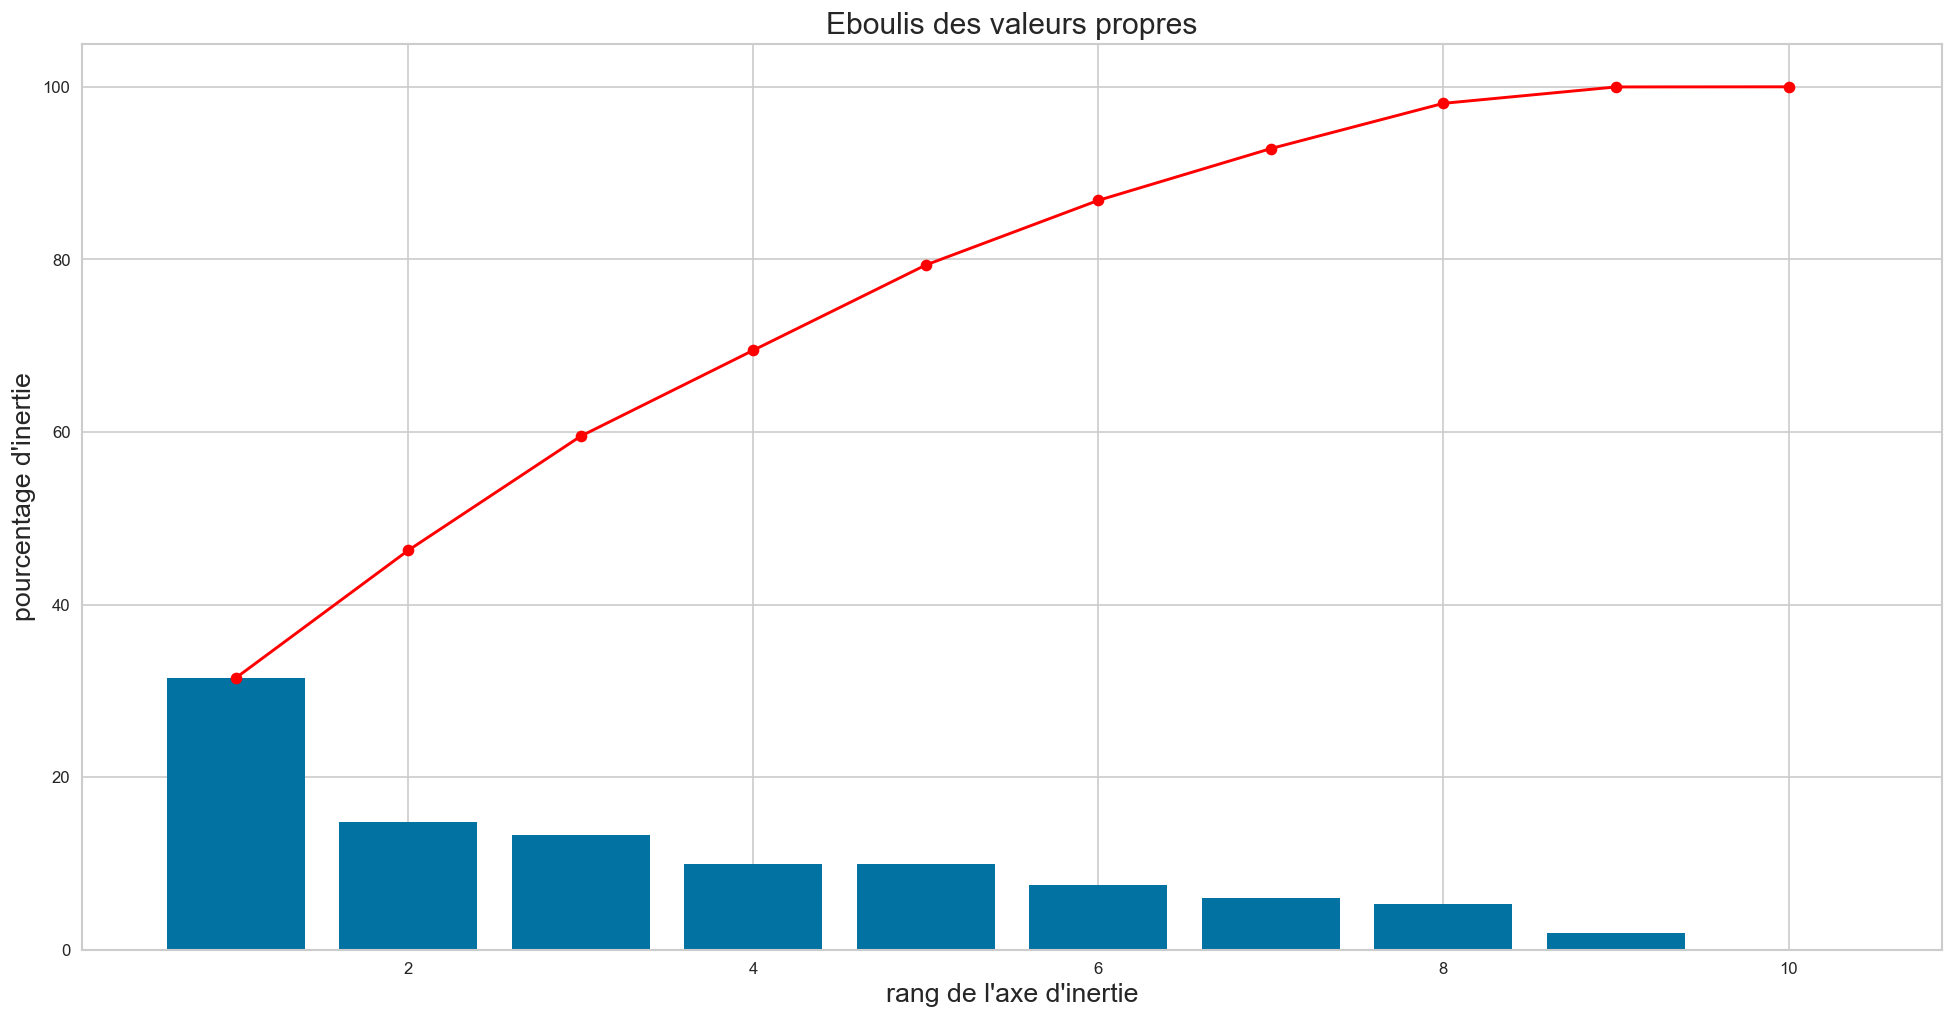

In [31]:
# Eboulis des valeurs propres
fig = plt.figure(figsize=[20, 10], dpi=120)
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, np.cumsum(scree), c="red", marker='o')
plt.rcParams.update({'font.size': 14})
plt.xlabel("rang de l'axe d'inertie", fontsize=16)
plt.ylabel("pourcentage d'inertie", fontsize=16)
plt.title("Eboulis des valeurs propres", fontsize=18)
plt.show(block=False)

## Cercle des correlations 

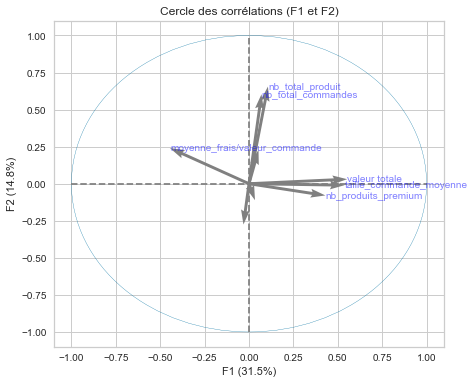

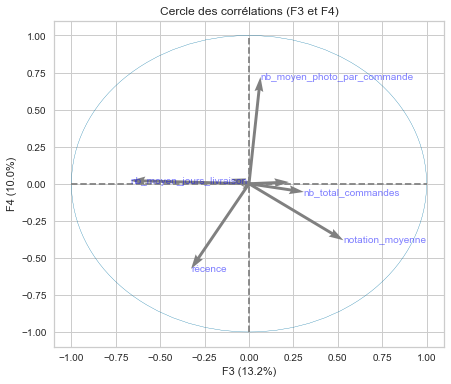

In [32]:
# cercles des corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 2 premiers plans factoriels, donc les 4 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7, 6))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:

                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if abs(x) >= 0.3 and x <= xmax or abs(y) >= 0.3 and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='10', ha='left',
                                 va='center', rotation=label_rotation, c="blue", alpha=0.5)
            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

pcs = pca.components_
sqrt_valprop = np.sqrt(pca.explained_variance_)

# print(sqrt_valprop)
QLT = np.sqrt(pcs[0, 0])

# print(pcs)
names = data.columns[0:n_components]
display_circles(pcs, n_components, pca, [
                (0, 1), (2, 3)], labels=np.array(names), lims=None)

## Projections des clients sur les plans factoriels 

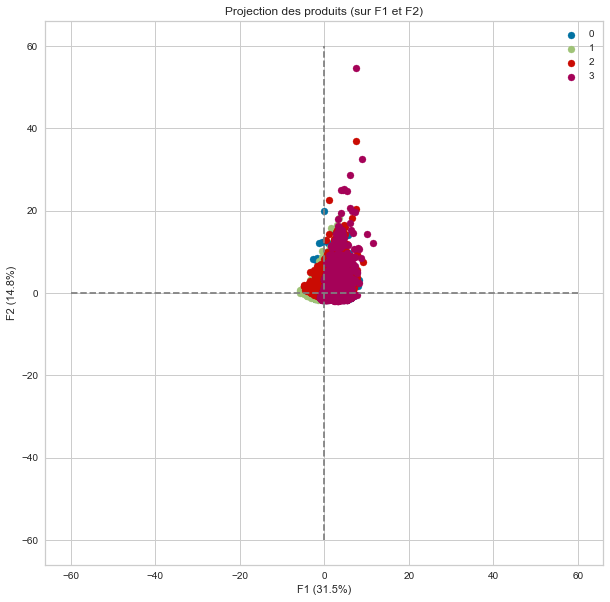

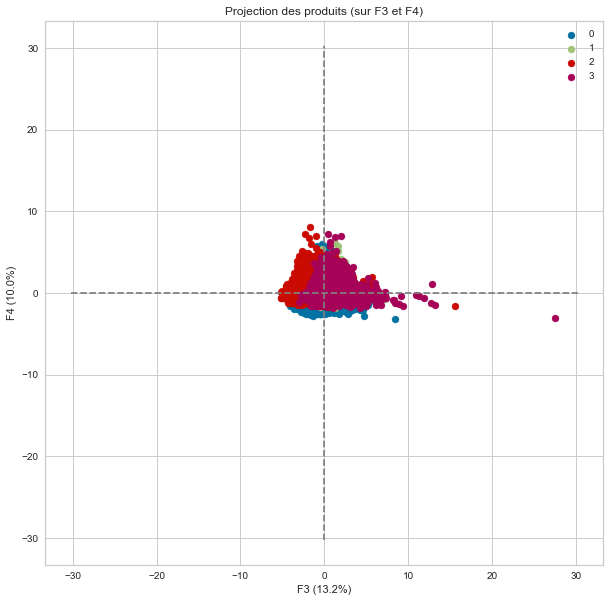

In [33]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)

                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:

                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    if x > 200 or y > 200:
                        print(i)
                        plt.text(x, y, labels[i],
                                 fontsize='10', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim = (-boundary, boundary)
            plt.ylim = (-boundary, boundary)

            # affichage des lignes horizontales et verticales
            plt.plot([-boundary, boundary], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-boundary, boundary], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des produits (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

# Projection des individus
data_projected = pca.transform(data_scaled_pca)
cluster = data['cluster'].values
display_factorial_planes(data_projected, 4, pca, [
                         (0, 1), (2, 3)], illustrative_var=cluster)

plt.show()

# Visualization des données - t-SNE

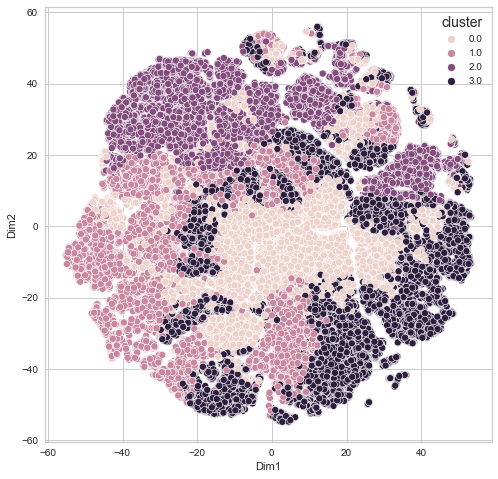

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,init='pca')
X_tsne = tsne.fit_transform(data_scaled_pca)
X_tsne_data = np.vstack((X_tsne.T, cluster)).T
col = var+['cluster']
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'cluster'])
df_tsne.head()
df_tsne.shape
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='cluster', x='Dim1', y='Dim2')
plt.show()

# Segmentation avec quantiles

## Pre-processing des variables

In [35]:
data_quant_df = pd.DataFrame()

In [36]:
data.columns

Index(['nb_total_commandes', 'nb_total_produit', 'nb_moyen_photo_par_commande',
       'valeur totale', 'taille_commande_moyenne', 'nb_moyen_jours_livraison',
       'notation_moyenne', 'nb_produits_premium',
       'moyenne_frais/valeur_commande', 'récence', 'cluster'],
      dtype='object')

In [37]:
data['nb_total_commandes'].value_counts()

1     90557
2      2573
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: nb_total_commandes, dtype: int64

In [38]:
data_quant_df['nb_total_commandes'+'_quant'] = data['nb_total_commandes']
data_quant_df[data_quant_df['nb_total_commandes'+'_quant'] > 5] = 5
data_quant_df['nb_total_commandes'+'_quant'].value_counts()

1    90557
2     2573
3      181
4       28
5       19
Name: nb_total_commandes_quant, dtype: int64

In [39]:
data['nb_total_produit'].value_counts()

1     81748
2      8797
3      1646
4       621
5       241
6       190
7        45
8        16
10       11
11       11
9        10
12        9
15        3
14        3
20        2
13        2
18        1
21        1
24        1
Name: nb_total_produit, dtype: int64

In [40]:
data_quant_df['nb_total_produit'+'_quant'] = data['nb_total_produit']
data_quant_df[data_quant_df['nb_total_produit'+'_quant'] > 5] = 5
data_quant_df['nb_total_produit'+'_quant'].value_counts()

1    81748
2     8797
3     1646
4      621
5      546
Name: nb_total_produit_quant, dtype: int64

In [41]:
data['nb_moyen_photo_par_commande'].value_counts()

1.000000     44482
2.000000     18040
3.000000     10642
4.000000      7211
5.000000      4724
6.000000      3221
7.000000      1338
0.000000      1260
8.000000       663
1.500000       435
10.000000      309
9.000000       275
2.500000       213
3.500000       139
11.000000       61
4.500000        56
12.000000       46
0.500000        31
5.500000        26
13.000000       25
2.333333        24
1.666667        22
1.333333        20
2.666667        11
17.000000        9
15.000000        9
6.500000         6
2.250000         5
3.333333         5
3.666667         5
4.666667         5
18.000000        4
14.000000        4
4.333333         3
7.500000         2
1.800000         2
8.500000         2
5.666667         2
1.600000         2
1.933333         1
3.800000         1
9.500000         1
6.750000         1
5.250000         1
3.750000         1
3.250000         1
14.500000        1
2.750000         1
5.333333         1
1.428571         1
2.833333         1
4.571429         1
2.200000    

In [42]:
data_quant_df['nb_moyen_photo_par_commande'+'_quant'] = pd.cut(
    data['nb_moyen_photo_par_commande'], bins=[-0.1, 1, 2, 3, 4, data['nb_moyen_photo_par_commande'].max()], labels=[5, 4, 3, 2, 1])
data_quant_df['nb_moyen_photo_par_commande'+'_quant'].value_counts()

5    45773
4    18524
3    10899
1    10799
2     7363
Name: nb_moyen_photo_par_commande_quant, dtype: int64

In [43]:
data['nb_produits_premium'].value_counts()

0    77651
1    15410
2      268
3       21
4        7
6        1
Name: nb_produits_premium, dtype: int64

In [44]:
data_quant_df['nb_produits_premium' +
              '_quant'] = data['nb_produits_premium'].values+1
data_quant_df[data_quant_df['nb_produits_premium'+'_quant'] > 5] = 5
data_quant_df['nb_produits_premium'+'_quant'].value_counts()

1    77651
2    15410
3      268
4       21
5        8
Name: nb_produits_premium_quant, dtype: int64

In [45]:
data['notation_moyenne'].value_counts()

5.000000    55076
4.000000    18214
1.000000     8928
3.000000     7695
2.000000     2818
4.500000      297
3.500000      152
2.500000       76
4.333333       22
4.666667       20
3.666667       18
1.500000       14
2.333333        5
4.200000        3
4.750000        3
3.333333        3
1.666667        3
3.750000        2
3.800000        2
2.777778        1
4.833333        1
1.333333        1
2.666667        1
4.250000        1
1.750000        1
3.400000        1
Name: notation_moyenne, dtype: int64

In [46]:
data_quant_df['notation_moyenne'+'_quant'] = pd.cut(data['notation_moyenne'], bins=[
                                                    0, 1, 2, 3, 4, data['notation_moyenne'].max()], labels=range(1, 6))
data_quant_df['notation_moyenne'+'_quant'].head()
data_quant_df['notation_moyenne'+'_quant'].value_counts()

5    55423
4    18392
1     8928
3     7778
2     2837
Name: notation_moyenne_quant, dtype: int64

In [47]:
# Create quartile Values using qcut function
data_quant_df['valeur totale' +
              '_quant'] = pd.qcut(data['valeur totale'], 5, labels=range(1, 6))
data_quant_df['taille_commande_moyenne' +
              '_quant'] = pd.qcut(data['taille_commande_moyenne'], 5, labels=range(1, 6))
data_quant_df['nb_moyen_jours_livraison'+'_quant'] = pd.qcut(
    data['nb_moyen_jours_livraison'], 5, labels=range(1, 6))
data_quant_df['moyenne_frais/valeur_commande'+'_quant'] = pd.qcut(
    data['moyenne_frais/valeur_commande'], 5, labels=range(1, 6))
data_quant_df['récence' +
              '_quant'] = pd.qcut(data['récence'], 5, labels=[5, 4, 3, 2, 1])
var_quant = ['nb_total_commandes_quant', 'nb_total_produit_quant', 'nb_moyen_photo_par_commande_quant', 'valeur totale_quant', 'taille_commande_moyenne_quant',
             'nb_moyen_jours_livraison_quant', 'notation_moyenne_quant', 'nb_produits_premium_quant', 'moyenne_frais/valeur_commande_quant', 'récence_quant']
data_quant_df = data_quant_df[var_quant]
data_quant_df.head()

nb_total_commandes_quant  \
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2                         1   
0000b849f77a49e4a4ce2b2a4ca5be3f                         1   
0000f46a3911fa3c0805444483337064                         1   
0000f6ccb0745a6a4b88665a16c9f078                         1   
0004aac84e0df4da2b147fca70cf8255                         1   

                                  nb_total_produit_quant  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2                       1   
0000b849f77a49e4a4ce2b2a4ca5be3f                       1   
0000f46a3911fa3c0805444483337064                       1   
0000f6ccb0745a6a4b88665a16c9f078                       1   
0004aac84e0df4da2b147fca70cf8255                       1   

                                 nb_moyen_photo_par_commande_quant  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2                                 5   
0000b849f77a49e4a4ce2b2a4ca5be3f                                 5   
0000f46a3911fa3c0805444483337064                                 3   
0000f6ccb0745a6a4b88665a16c9f078                                 1   
0004aac84e0df4da2b147fca70cf8255                                 3   

                                 valeur totale_quant  \
customer_unique_id                                     
0000366f3b9a7992bf8c76cfdf3221e2                   4   
0000b849f77a49e4a4ce2b2a4ca5be3f                   1   
0000f46a3911fa3c0805444483337064                   2   
0000f6ccb0745a6a4b88665a16c9f078                   1   
0004aac84e0df4da2b147fca70cf8255                   5   

                                 taille_commande_moyenne_quant  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                             4   
0000b849f77a49e4a4ce2b2a4ca5be3f                             1   
0000f46a3911fa3c0805444483337064                             3   
0000f6ccb0745a6a4b88665a16c9f078                             1   
0004aac84e0df4da2b147fca70cf8255                             4   

                                 nb_moyen_jours_livraison_quant  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2                              1   
0000b849f77a49e4a4ce2b2a4ca5be3f                              1   
0000f46a3911fa3c0805444483337064                              5   
0000f6ccb0745a6a4b88665a16c9f078                              5   
0004aac84e0df4da2b147fca70cf8255                              4   

                                 notation_moyenne_quant  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                      5   
0000b849f77a49e4a4ce2b2a4ca5be3f                      4   
0000f46a3911fa3c0805444483337064                      3   
0000f6ccb0745a6a4b88665a16c9f078                      4   
0004aac84e0df4da2b147fca70cf8255                      5   

                                  nb_produits_premium_quant  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                          1   
0000b849f77a49e4a4ce2b2a4ca5be3f                          1   
0000f46a3911fa3c0805444483337064                          1   
0000f6ccb0745a6a4b88665a16c9f078                          1   
0004aac84e0df4da2b147fca70cf8255                          2   

                                 moyenne_frais/valeur_commande_quant  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2                                   1   
0000b849f77a49e4a4ce2b2a4ca5be3f                                   5   
0000f46a3911fa3c0805444483337064                                   3   
0000f6ccb0745a6a4b88665a16c9f078                                   5   
0004aac84e0df4da2b147fca70cf8255                                   1   



## Définition des clusters 

In [48]:
data_quant_df['score'] = data_quant_df[data_quant_df.columns].sum(axis=1)

In [49]:
data_quant_df.head()

nb_total_commandes_quant  \
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2                         1   
0000b849f77a49e4a4ce2b2a4ca5be3f                         1   
0000f46a3911fa3c0805444483337064                         1   
0000f6ccb0745a6a4b88665a16c9f078                         1   
0004aac84e0df4da2b147fca70cf8255                         1   

                                  nb_total_produit_quant  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2                       1   
0000b849f77a49e4a4ce2b2a4ca5be3f                       1   
0000f46a3911fa3c0805444483337064                       1   
0000f6ccb0745a6a4b88665a16c9f078                       1   
0004aac84e0df4da2b147fca70cf8255                       1   

                                 nb_moyen_photo_par_commande_quant  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2                                 5   
0000b849f77a49e4a4ce2b2a4ca5be3f                                 5   
0000f46a3911fa3c0805444483337064                                 3   
0000f6ccb0745a6a4b88665a16c9f078                                 1   
0004aac84e0df4da2b147fca70cf8255                                 3   

                                 valeur totale_quant  \
customer_unique_id                                     
0000366f3b9a7992bf8c76cfdf3221e2                   4   
0000b849f77a49e4a4ce2b2a4ca5be3f                   1   
0000f46a3911fa3c0805444483337064                   2   
0000f6ccb0745a6a4b88665a16c9f078                   1   
0004aac84e0df4da2b147fca70cf8255                   5   

                                 taille_commande_moyenne_quant  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                             4   
0000b849f77a49e4a4ce2b2a4ca5be3f                             1   
0000f46a3911fa3c0805444483337064                             3   
0000f6ccb0745a6a4b88665a16c9f078                             1   
0004aac84e0df4da2b147fca70cf8255                             4   

                                 nb_moyen_jours_livraison_quant  \
customer_unique_id                                                
0000366f3b9a7992bf8c76cfdf3221e2                              1   
0000b849f77a49e4a4ce2b2a4ca5be3f                              1   
0000f46a3911fa3c0805444483337064                              5   
0000f6ccb0745a6a4b88665a16c9f078                              5   
0004aac84e0df4da2b147fca70cf8255                              4   

                                 notation_moyenne_quant  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                      5   
0000b849f77a49e4a4ce2b2a4ca5be3f                      4   
0000f46a3911fa3c0805444483337064                      3   
0000f6ccb0745a6a4b88665a16c9f078                      4   
0004aac84e0df4da2b147fca70cf8255                      5   

                                  nb_produits_premium_quant  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                          1   
0000b849f77a49e4a4ce2b2a4ca5be3f                          1   
0000f46a3911fa3c0805444483337064                          1   
0000f6ccb0745a6a4b88665a16c9f078                          1   
0004aac84e0df4da2b147fca70cf8255                          2   

                                 moyenne_frais/valeur_commande_quant  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2                                   1   
0000b849f77a49e4a4ce2b2a4ca5be3f                                   5   
0000f46a3911fa3c0805444483337064                                   3   
0000f6ccb0745a6a4b88665a16c9f078                                   5   
0004aac84e0df4da2b147fca70cf8255                                   1   



In [50]:
data_quant_df['cluster'] = pd.qcut(
    data_quant_df['score'], 4, labels=range(1, 5))

In [51]:
data_quant_df['cluster'].value_counts()

1    30524
3    25069
2    19674
4    18091
Name: cluster, dtype: int64

In [52]:
data['cluster'] = data_quant_df['cluster']

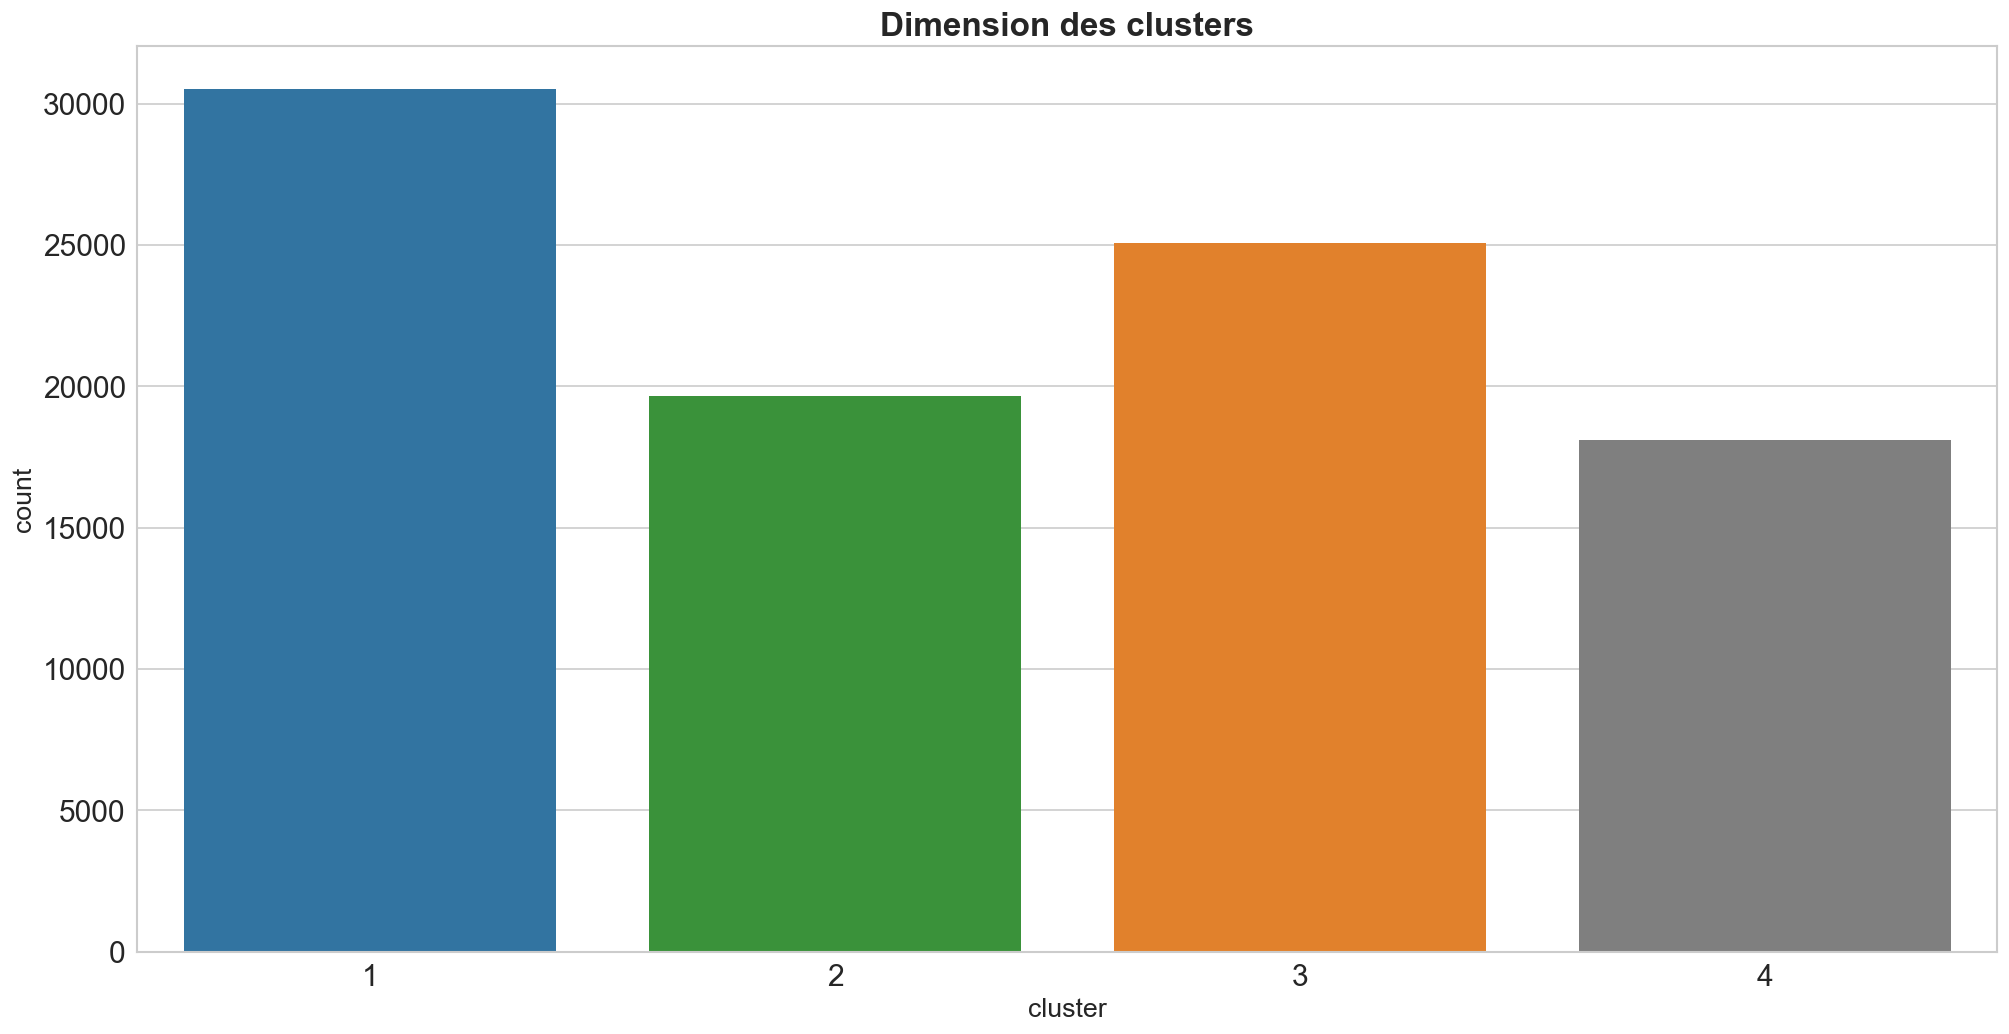

In [53]:
data_cnt = pd.DataFrame(data=data['cluster'].value_counts())
data_cnt.rename(columns={"cluster": "count"}, inplace=True)
fig = plt.figure(figsize=[20, 10], dpi=120)
sns.barplot(x=data_cnt.index, y='count', data=data_cnt, palette=palette)
plt.title('Dimension des clusters', fontsize=20, fontweight="bold")
plt.xlabel('cluster', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

## Radarplot et caracterisation des clusters 

In [54]:
data_summary = data.groupby('cluster').agg({
    'nb_total_commandes': 'mean',
    'nb_total_produit': 'mean',
    'nb_moyen_photo_par_commande': 'mean',
    'valeur totale': 'mean',
    'taille_commande_moyenne': 'mean',
    'nb_moyen_jours_livraison': 'mean',
    'notation_moyenne': 'mean',
    'nb_produits_premium': 'mean',
    'moyenne_frais/valeur_commande': 'mean',
    'récence': 'mean',
}).round(2)

In [55]:
data_summary.head()

nb_total_commandes  nb_total_produit  nb_moyen_photo_par_commande  \
cluster                                                                      
1                      1.00              1.04                         3.01   
2                      1.01              1.08                         2.16   
3                      1.03              1.17                         1.88   
4                      1.11              1.54                         1.52   

         valeur totale  taille_commande_moyenne  nb_moyen_jours_livraison  \
cluster                                                                     
1                 3.95                     4.21                      2.10   
2                 4.26                     4.52                      2.36   
3                 4.72                     4.93                      2.51   
4                 5.31                     5.44                      2.66   

         notation_moyenne  nb_produits_premium  moyenne_frais/valeur_commande  \
cluster                                                                         
1                    3.88                 0.02                           0.20   
2                    4.18                 0.08                           0.20   
3                    4.28                 0.21                           0.17   
4                    4.45                 0.46                           0.16   

         récence  
cluster           
1         297.30  
2         238.08  
3         210.30  
4         170.78

In [56]:
data_summary_mean = data_summary.values.tolist()

In [57]:
data_scaled_summary_mean = scaler.fit_transform(data_summary_mean)
data_scaled_summary_mean_df = pd.DataFrame(
    data_scaled_summary_mean, columns=var).round(2)
data_scaled_summary_mean_df.head()

nb_total_commandes  nb_total_produit  nb_moyen_photo_par_commande  \
0                0.00              0.00                         1.00   
1                0.09              0.08                         0.43   
2                0.27              0.26                         0.24   
3                1.00              1.00                         0.00   

   valeur totale  taille_commande_moyenne  nb_moyen_jours_livraison  \
0           0.00                     0.00                      0.00   
1           0.23                     0.25                      0.46   
2           0.57                     0.59                      0.73   
3           1.00                     1.00                      1.00   

   notation_moyenne  nb_produits_premium  moyenne_frais/valeur_commande  \
0              0.00                 0.00                           1.00   
1              0.53                 0.14                           1.00   
2              0.70                 0.43                           0.25   
3              1.00                 1.00                           0.00   

   récence  
0     1.00  
1     0.53  
2     0.31  
3     0.00

In [58]:
fig = go.Figure(
    data=[
        go.Scatterpolar(r=data_scaled_summary_mean[0], theta=var, name='Profil Client 1',
                        fill='toself', mode='lines', opacity=0.6, line_color='blue'),
        go.Scatterpolar(r=data_scaled_summary_mean[1], theta=var, name='Profil Client 2',
                        fill='toself', mode='lines', opacity=0.6, line_color='green'),
        go.Scatterpolar(r=data_scaled_summary_mean[2], theta=var, name='Profil Client 3',
                        fill='toself', mode='lines', opacity=0.6, line_color='orange'),
        go.Scatterpolar(r=data_scaled_summary_mean[3], theta=var, name='Profil Client 4',
                        fill='toself', mode='lines', opacity=0.6, line_color='gray'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Comparaison clients'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.update_layout(
    margin=dict(l=200, r=200, t=100, b=20),
    autosize=False,
    width=1000,
    height=1000
)

fig.show()

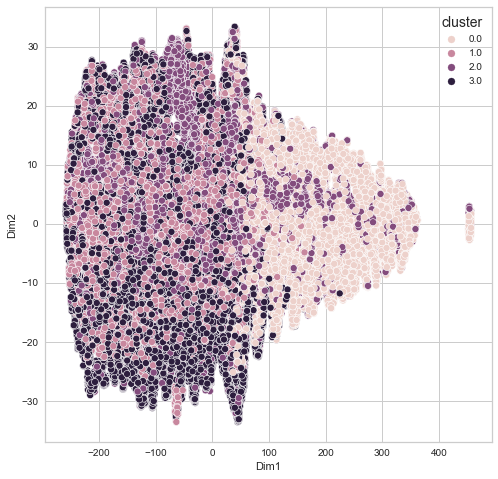

In [59]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca')
X_tsne = tsne.fit_transform(data)
X_tsne_data = np.vstack((X_tsne.T, cluster)).T
col = var+['cluster']
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'cluster'])
df_tsne.head()
df_tsne.shape
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='cluster', x='Dim1', y='Dim2')
plt.show()

# Segmentation catégorique -  clustering avec K-modes

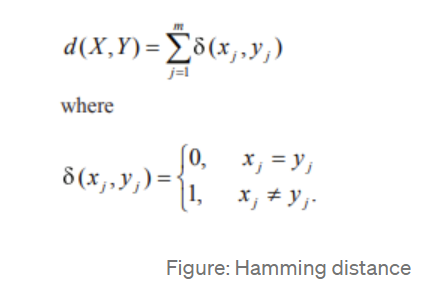

In [60]:
from kmodes.kmodes import KModes

In [61]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nb_total_commandes             93358 non-null  int64  
 1   nb_total_produit               93358 non-null  int64  
 2   date_commande_plus_recente     93358 non-null  object 
 3   nb_moyen_photo_par_commande    93358 non-null  float64
 4   valeur totale                  93358 non-null  float64
 5   taille_commande_moyenne        93358 non-null  float64
 6   max_type_payement              93358 non-null  int64  
 7   max_tranches_payement          93358 non-null  int64  
 8   nb_moyen_jours_livraison       93358 non-null  float64
 9   notation_moyenne               93358 non-null  float64
 10  nb_produits_premium            93358 non-null  int64  
 11  moyenne_frais/valeur_commande  93358 non-null  float6

In [62]:
subset = ['max_type_payement', 'max_tranches_payement',
          'customer_state', 'product_category']

In [63]:
data_qualit = data_df[subset]
data_qualit.head()

max_type_payement  max_tranches_payement  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2                  0                      1   
0000b849f77a49e4a4ce2b2a4ca5be3f                  0                      0   
0000f46a3911fa3c0805444483337064                  0                      1   
0000f6ccb0745a6a4b88665a16c9f078                  0                      1   
0004aac84e0df4da2b147fca70cf8255                  0                      1   

                                 customer_state  \
customer_unique_id                                
0000366f3b9a7992bf8c76cfdf3221e2      São Paulo   
0000b849f77a49e4a4ce2b2a4ca5be3f      São Paulo   
0000f46a3911fa3c0805444483337064      São Paulo   
0000f6ccb0745a6a4b88665a16c9f078      São Paulo   
0004aac84e0df4da2b147fca70cf8255      São Paulo   

                                                           product_category  
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2  Beauty, Health personel and Householdcare  
0000b849f77a49e4a4ce2b2a4ca5be3f  Beauty, Health personel and Householdcare  
0000f46a3911fa3c0805444483337064                        Toys, Hobby and DIY  
0000f6ccb0745a6a4b88665a16c9f078                       Auto and Electronics  
0004aac84e0df4da2b147fca70cf8255                       Auto and Electronics

In [64]:
data_df['max_type_payement'] = data_df['max_type_payement'].replace(
    [0, 1], ['Single', 'Multiple'])
data_df['max_tranches_payement'] = data_df['max_tranches_payement'].replace(
    [0, 1], ['Single', 'Multiple'])

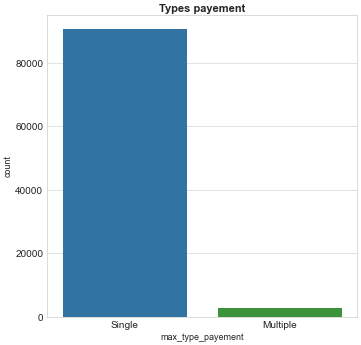

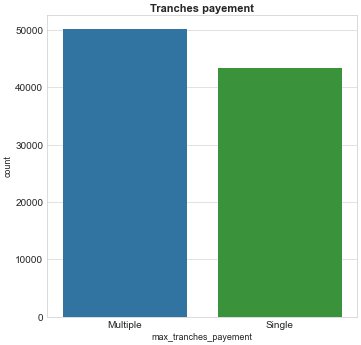

In [65]:
data_cnt = pd.DataFrame(data=data_df['max_type_payement'].value_counts())
data_cnt.rename(columns={"max_type_payement": "count"}, inplace=True)
fig = plt.figure(figsize=[10, 10], dpi=40)
sns.barplot(x=data_cnt.index, y='count', data=data_cnt, palette=palette)
plt.title('Types payement', fontsize=20, fontweight="bold")
plt.xlabel('max_type_payement', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
data_cnt = pd.DataFrame(data=data_df['max_tranches_payement'].value_counts())
data_cnt.rename(columns={"max_tranches_payement": "count"}, inplace=True)
fig = plt.figure(figsize=[10, 10], dpi=40)
sns.barplot(x=data_cnt.index, y='count', data=data_cnt, palette=palette)
plt.title('Tranches payement', fontsize=20, fontweight="bold")
plt.xlabel('max_tranches_payement', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [66]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nb_total_commandes             93358 non-null  int64  
 1   nb_total_produit               93358 non-null  int64  
 2   date_commande_plus_recente     93358 non-null  object 
 3   nb_moyen_photo_par_commande    93358 non-null  float64
 4   valeur totale                  93358 non-null  float64
 5   taille_commande_moyenne        93358 non-null  float64
 6   max_type_payement              93358 non-null  object 
 7   max_tranches_payement          93358 non-null  object 
 8   nb_moyen_jours_livraison       93358 non-null  float64
 9   notation_moyenne               93358 non-null  float64
 10  nb_produits_premium            93358 non-null  int64  
 11  moyenne_frais/valeur_commande  93358 non-null  float6

In [67]:
subset = ['max_type_payement', 'max_tranches_payement',
          'customer_state', 'product_category']

In [68]:
data_qualit = data_df[subset]
data_qualit.head()

max_type_payement max_tranches_payement  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2            Single              Multiple   
0000b849f77a49e4a4ce2b2a4ca5be3f            Single                Single   
0000f46a3911fa3c0805444483337064            Single              Multiple   
0000f6ccb0745a6a4b88665a16c9f078            Single              Multiple   
0004aac84e0df4da2b147fca70cf8255            Single              Multiple   

                                 customer_state  \
customer_unique_id                                
0000366f3b9a7992bf8c76cfdf3221e2      São Paulo   
0000b849f77a49e4a4ce2b2a4ca5be3f      São Paulo   
0000f46a3911fa3c0805444483337064      São Paulo   
0000f6ccb0745a6a4b88665a16c9f078      São Paulo   
0004aac84e0df4da2b147fca70cf8255      São Paulo   

                                                           product_category  
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2  Beauty, Health personel and Householdcare  
0000b849f77a49e4a4ce2b2a4ca5be3f  Beauty, Health personel and Householdcare  
0000f46a3911fa3c0805444483337064                        Toys, Hobby and DIY  
0000f6ccb0745a6a4b88665a16c9f078                       Auto and Electronics  
0004aac84e0df4da2b147fca70cf8255                       Auto and Electronics

In [69]:
data_qualit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   max_type_payement      93358 non-null  object
 1   max_tranches_payement  93358 non-null  object
 2   customer_state         93358 non-null  object
 3   product_category       93358 non-null  object
dtypes: object(4)
memory usage: 5.6+ MB


In [70]:
dfMatrix = data_qualit.to_numpy()

## Elbow method pour le choix du nombre optimal de clusters 

In [71]:
cost = []
for cluster in range(2, 10):
    kmodes = KModes(n_jobs=-1, n_clusters=cluster,
                    init='Huang', random_state=0)
    kmodes.fit_predict(dfMatrix.astype(str))
    cost.append(kmodes.cost_)
    print('Nombre clusters: {}'.format(cluster))

Nombre clusters: 2
Nombre clusters: 3
Nombre clusters: 4
Nombre clusters: 5
Nombre clusters: 6
Nombre clusters: 7
Nombre clusters: 8
Nombre clusters: 9


In [72]:
# On converte les résultats dans un dataframe afin de tracer le graphique
df_cost = pd.DataFrame({'Cluster': range(2, 10), 'Cost': cost})

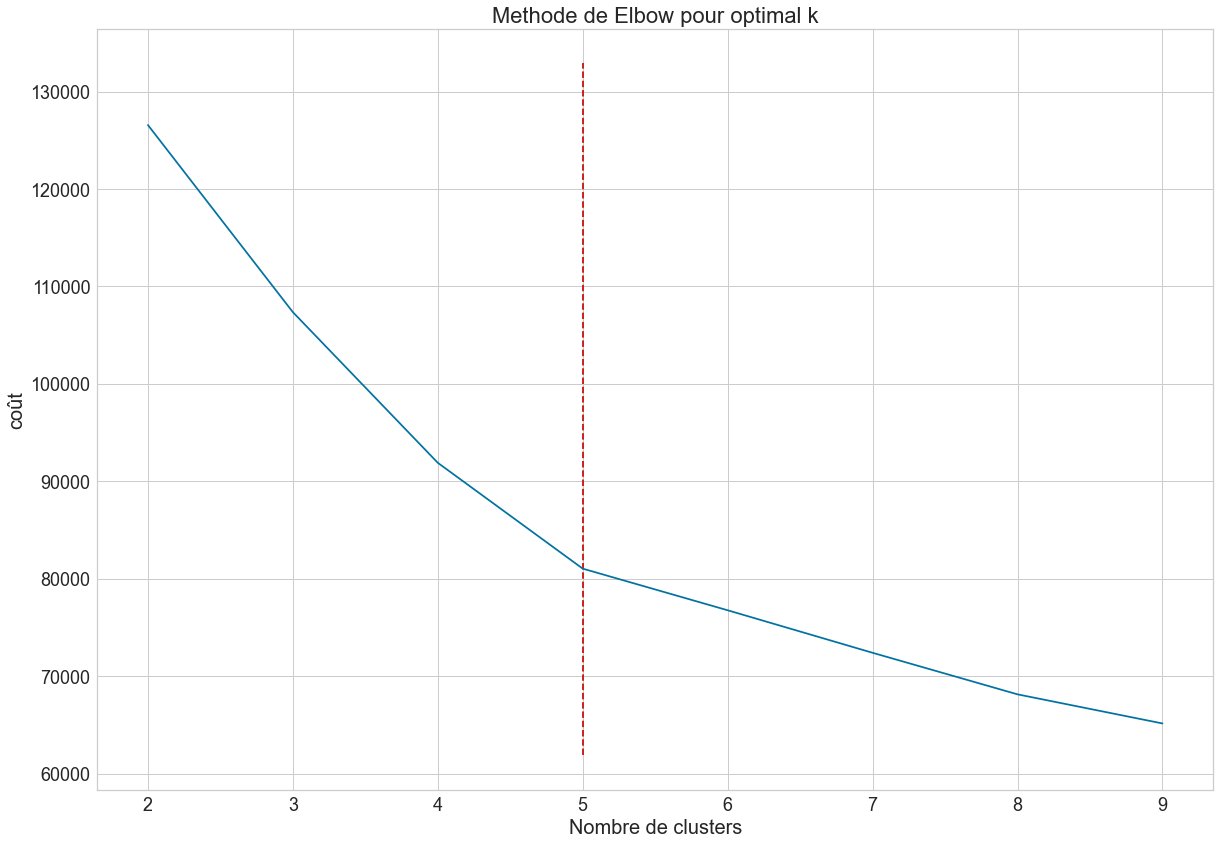

In [73]:
fig = plt.figure(figsize=[20, 14])
plt.plot(range(2, 10), cost)
plt.title('Methode de Elbow pour optimal k', fontsize=22)
plt.xlabel('Nombre de clusters', fontsize=20)
plt.ylabel('coût', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ymin = np.min(cost)*0.95
ymax = np.max(cost)*1.05
plt.ylim = (ymin, ymax)
plt.vlines(x=5, linestyles='--', color='r', ymin=ymin, ymax=ymax)
plt.show()

In [74]:
kmodes = KModes(n_jobs=-1, n_clusters=5, init='Huang', random_state=0)
kmodes.fit_predict(dfMatrix.astype(str))

array([1, 0, 2, ..., 4, 1, 3], dtype=uint16)

In [75]:
data_qualit['Cluster Labels'] = kmodes.labels_
data_qualit['Segment'] = data_qualit['Cluster Labels'].map(
    {0: 'Profil Client1', 1: 'Profil Client2', 2: 'Profil Client3', 3: 'Profil Client4', 4: 'Profil Client5'})

In [76]:
# On crée un index pour l'interpretation des clusters
index = ['Profil Client1', 'Profil Client2',
         'Profil Client3', 'Profil Client4', 'Profil Client5']
# On crée le DataFrame
data_qualit_centroids = pd.DataFrame(kmodes.cluster_centroids_, columns=[
                                     'max_type_payement', 'max_tranches_payement', 'customer_state', 'product_category'], index=index)
data_qualit_centroids

max_type_payement max_tranches_payement  \
Profil Client1            Single                Single   
Profil Client2            Single              Multiple   
Profil Client3            Single              Multiple   
Profil Client4            Single              Multiple   
Profil Client5            Single                Single   

                                                   customer_state  \
Profil Client1                                          São Paulo   
Profil Client2  Rio de Janeiro, Belo Horizonte, Porto Alegre, ...   
Profil Client3                                          São Paulo   
Profil Client4                                             others   
Profil Client5  Rio de Janeiro, Belo Horizonte, Porto Alegre, ...   

                                         product_category  
Profil Client1                                 Furnitures  
Profil Client2  Beauty, Health personel and Householdcare  
Profil Client3                                 Furnitures  
Profil Client4                        Toys, Hobby and DIY  
Profil Client5                       Auto and Electronics

In [77]:
data_qualit['Segment'].value_counts()

Profil Client2    28023
Profil Client1    26231
Profil Client3    18394
Profil Client5    12051
Profil Client4     8659
Name: Segment, dtype: int64

In [78]:
data_qualit_grouped_cnt = data_qualit.groupby(['Segment']).count().reindex()

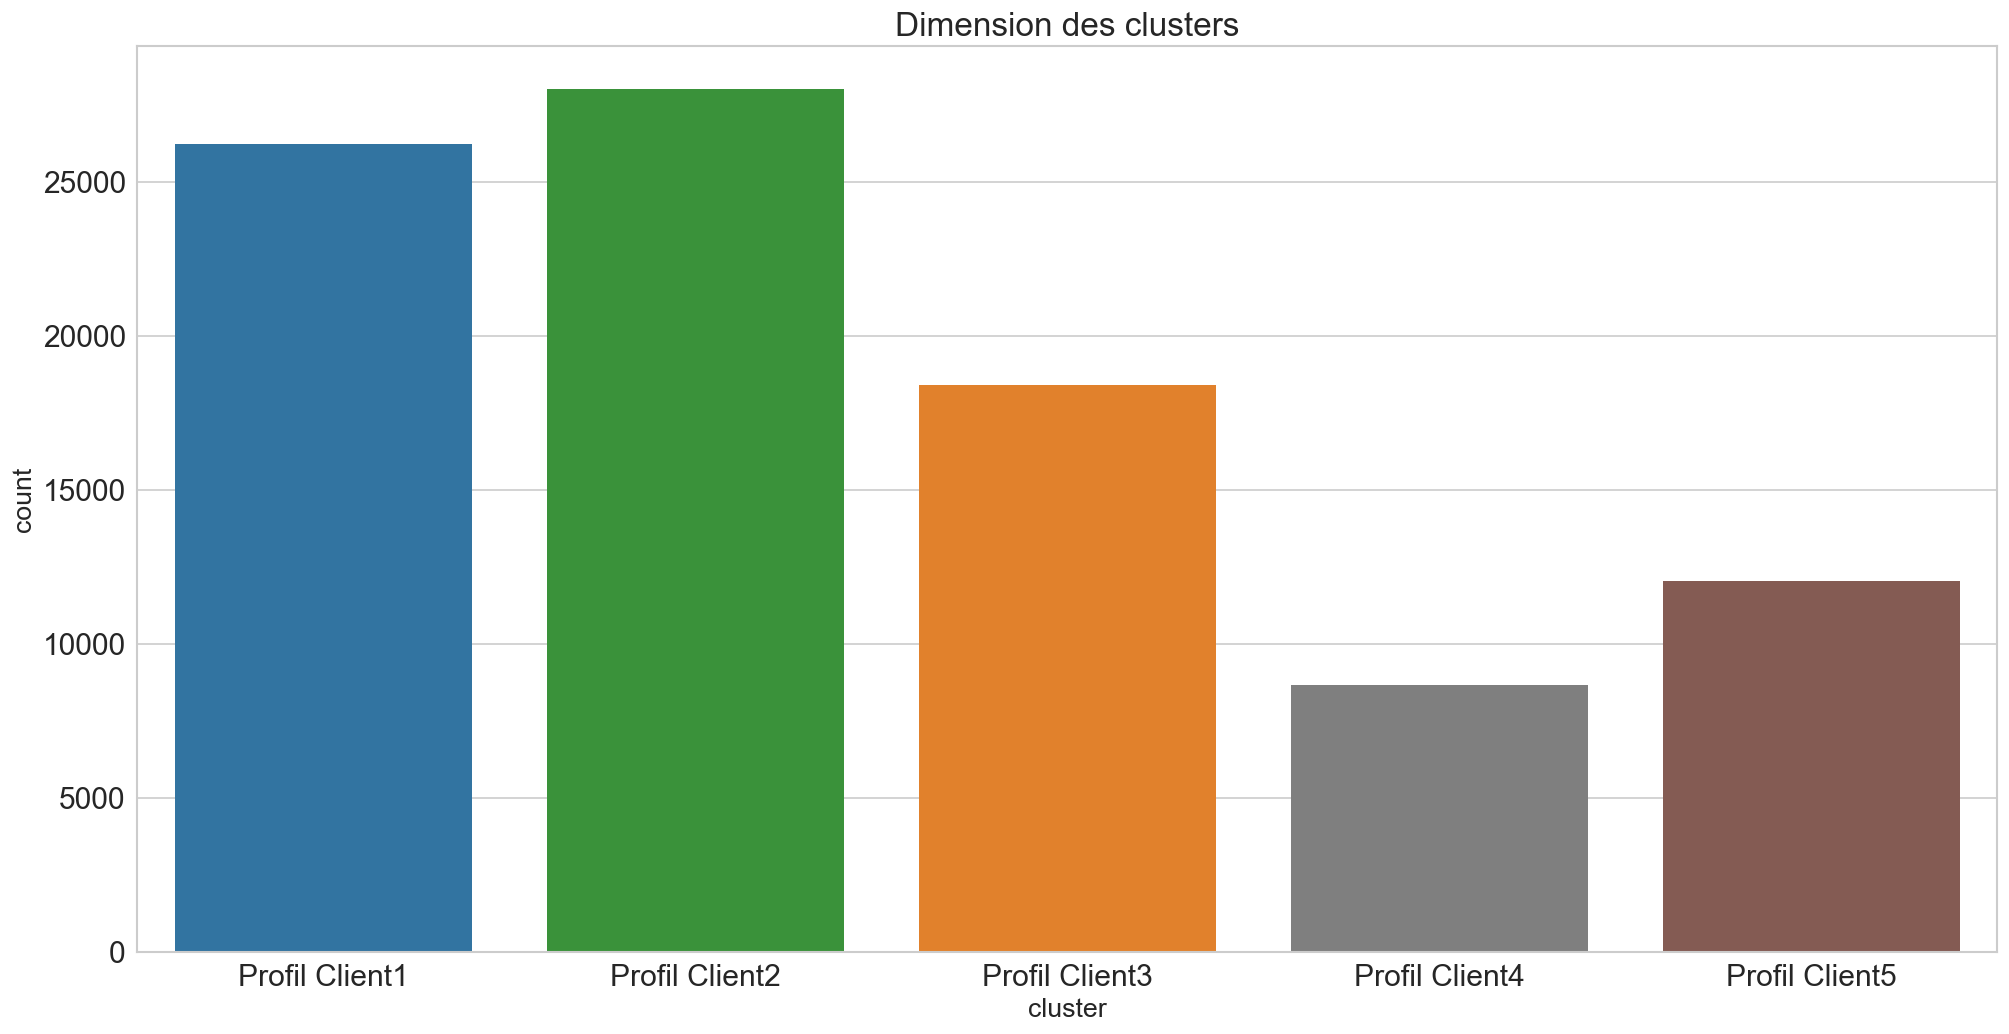

In [79]:
palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:gray', 'tab:brown']
fig = plt.figure(figsize=[20, 10], dpi=120)
sns.barplot(x=data_qualit_centroids.index, y='Cluster Labels',
            data=data_qualit_grouped_cnt, palette=palette)
plt.title('Dimension des clusters', fontsize=20)
plt.xlabel('cluster', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [80]:
data_qualit.drop(['Cluster Labels'], axis=1, inplace=True)

In [81]:
data_qualit.head()

max_type_payement max_tranches_payement  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2            Single              Multiple   
0000b849f77a49e4a4ce2b2a4ca5be3f            Single                Single   
0000f46a3911fa3c0805444483337064            Single              Multiple   
0000f6ccb0745a6a4b88665a16c9f078            Single              Multiple   
0004aac84e0df4da2b147fca70cf8255            Single              Multiple   

                                 customer_state  \
customer_unique_id                                
0000366f3b9a7992bf8c76cfdf3221e2      São Paulo   
0000b849f77a49e4a4ce2b2a4ca5be3f      São Paulo   
0000f46a3911fa3c0805444483337064      São Paulo   
0000f6ccb0745a6a4b88665a16c9f078      São Paulo   
0004aac84e0df4da2b147fca70cf8255      São Paulo   

                                                           product_category  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2  Beauty, Health personel and Householdcare   
0000b849f77a49e4a4ce2b2a4ca5be3f  Beauty, Health personel and Householdcare   
0000f46a3911fa3c0805444483337064                        Toys, Hobby and DIY   
0000f6ccb0745a6a4b88665a16c9f078                       Auto and Electronics   
0004aac84e0df4da2b147fca70cf8255                       Auto and Electronics   

                                         Segment  
customer_unique_id                                
0000366f3b9a7992bf8c76cfdf3221e2  Profil Client2  
0000b849f77a49e4a4ce2b2a4ca5be3f  Profil Client1  
0000f46a3911fa3c0805444483337064  Profil Client3  
0000f6ccb0745a6a4b88665a16c9f078  Profil Client3  
0004aac84e0df4da2b147fca70cf8255  Profil Client3

## Analyse et caracterisation des clusters 

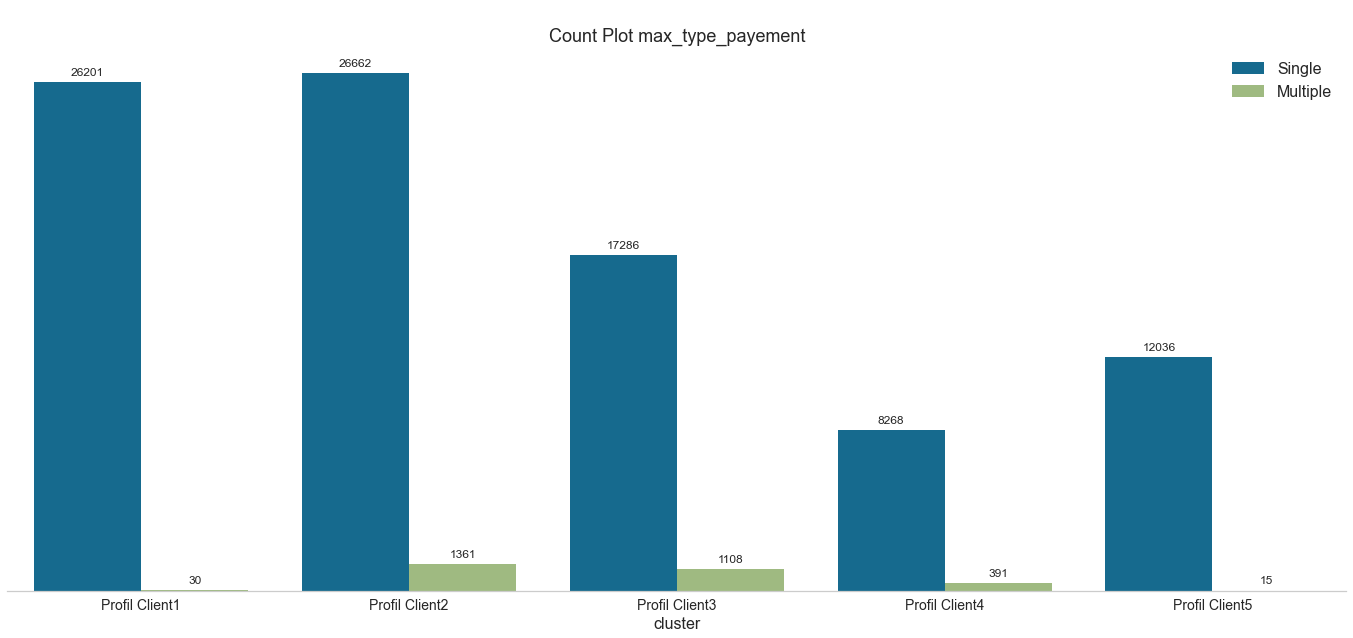

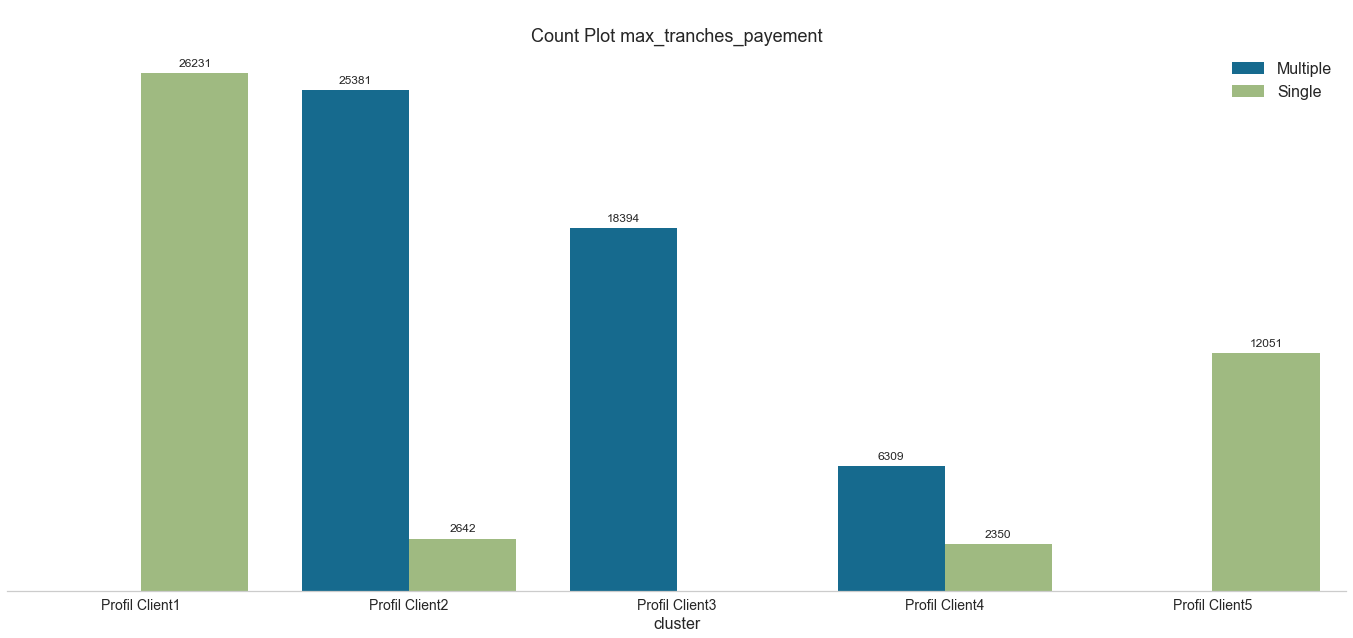

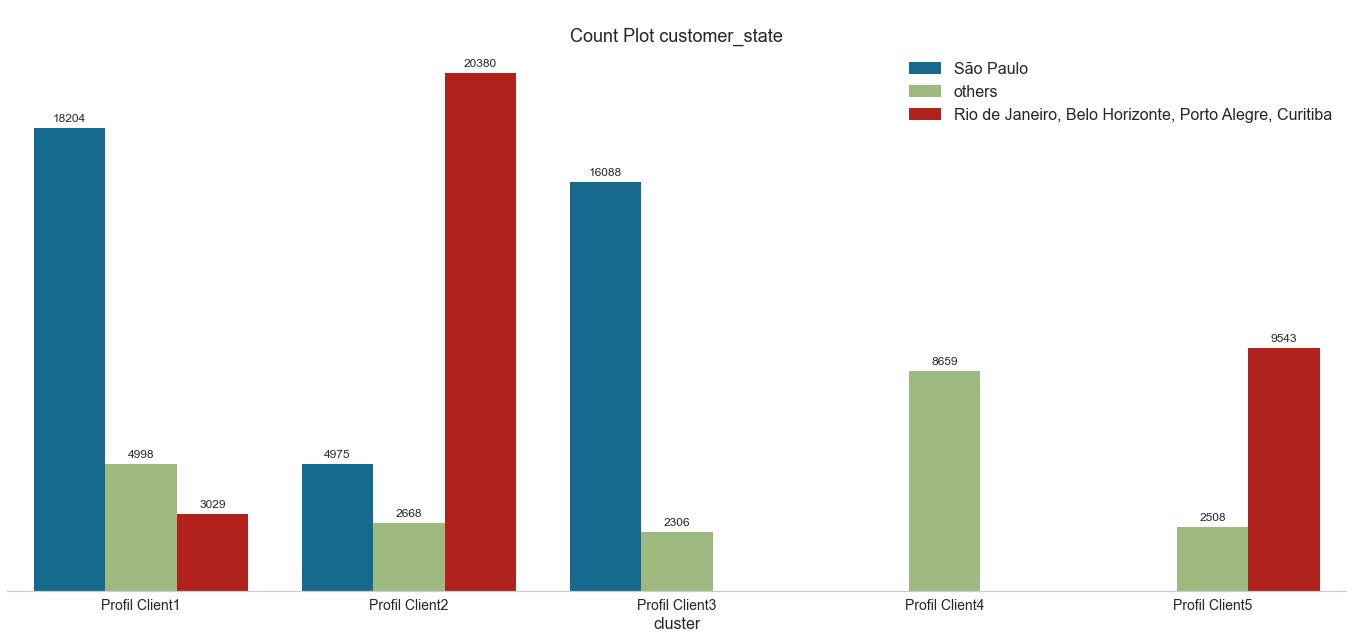

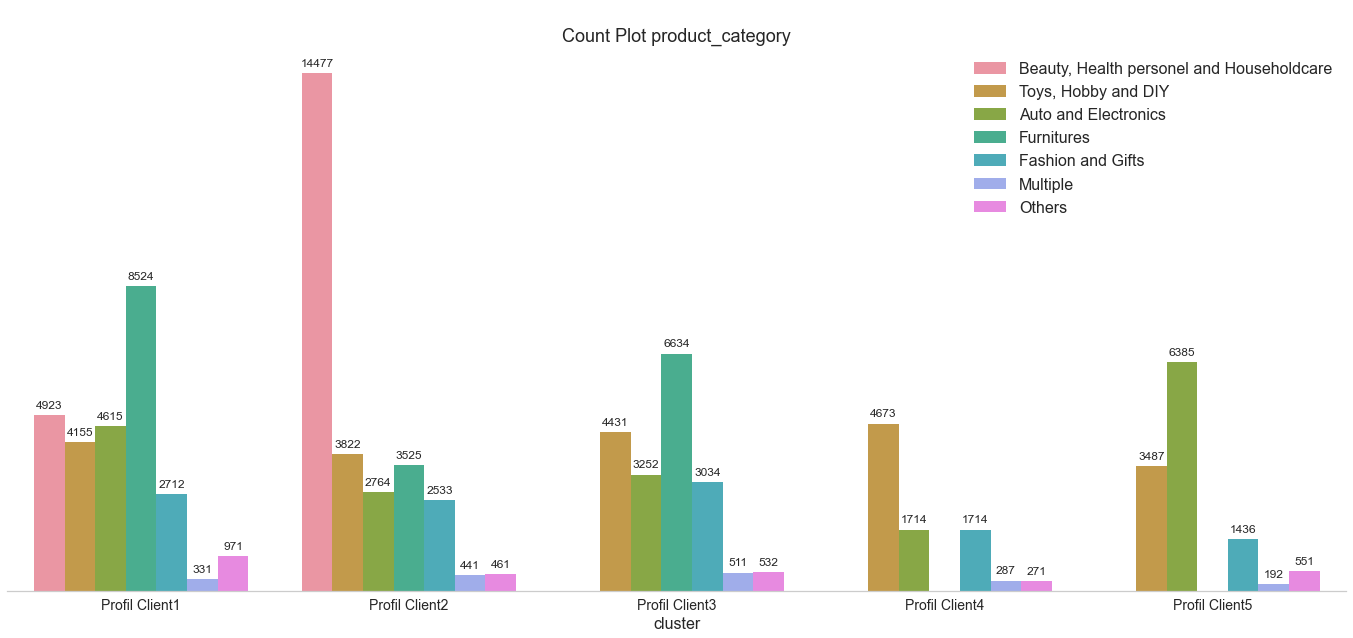

In [82]:
# Visualize the cluster
order = ['Profil Client1', 'Profil Client2',
         'Profil Client3', 'Profil Client4', 'Profil Client5']
for i in data_qualit.iloc[:, :-1]:
    plt.figure(figsize=(24, 10))
    ax = sns.countplot(data=data_qualit, x='Segment', order=order, hue=i)
    plt.title('\nCount Plot {}'.format(i), fontsize=18)
    ax.legend(loc='upper right', fontsize=16)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=12)
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)
    plt.xticks(fontsize=14)
    plt.xlabel('cluster', fontsize=16)
    plt.show()